# CRON Stock Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
pd.options.display.max_columns=1000
plt.style.use(style='seaborn')

In [3]:
df_cron = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/cron.csv')
df_cron['Date'] = pd.to_datetime(df_cron['Date'])
df_cron = df_cron.set_index('Date')
df_cron = df_cron.rename(columns={'Open':'cron_Open', 'High':'cron_High', 'Low':'cron_Low', 'Close':'cron_Close', 'Volume':'cron_Volume'})
df_cron = df_cron.drop('Adj Close', axis=1)
df_cron['cron_prev_close'] = df_cron['cron_Close'].shift(1)
df_cron['cron_next_close'] = df_cron['cron_Close'].shift(-1)
df_cron['cron_diff'] = df_cron['cron_Close'].diff()
df_cron['cron_%change'] = df_cron['cron_Close'].pct_change()
df_cron['cron_5day_avg_close'] = df_cron['cron_Close'].rolling(5).mean()
df_cron['cron_5day_avg_diff'] = df_cron['cron_diff'].rolling(5).mean()
df_cron['cron_10day_avg_close'] = df_cron['cron_Close'].rolling(10).mean()
df_cron['cron_10day_avg_diff'] = df_cron['cron_diff'].rolling(10).mean()

In [4]:
df_cron

cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24      8.380     7.170        7.62      2801000   
2018-02-28       7.75      9.170     7.335        9.17      9875400   
2018-03-01       9.18     10.050     8.520        9.69     11858800   
2018-03-02       9.50      9.700     9.250        9.40      3325100   
2018-03-05       9.67     10.250     9.460        9.77      6488200   
...               ...        ...       ...         ...          ...   
2022-05-17       3.51      3.610     3.430        3.54      1653200   
2022-05-18       3.52      3.535     3.315        3.32      1256600   
2022-05-19       3.32      3.495     3.280        3.42      1582400   
2022-05-20       3.47      3.540     3.280        3.39      1197100   
2022-05-23       3.43      3.442     3.170        3.18      1228100   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-02-27              NaN             9.17        NaN           NaN   
2018-02-28             7.62             9.69       1.55      0.203412   
2018-03-01             9.17             9.40       0.52      0.056707   
2018-03-02             9.69             9.77      -0.29     -0.029928   
2018-03-05             9.40             9.91       0.37      0.039362   
...                     ...              ...        ...           ...   
2022-05-17             3.43             3.32       0.11      0.032070   
2022-05-18             3.54             3.42      -0.22     -0.062147   
2022-05-19             3.32             3.39       0.10      0.030120   
2022-05-20             3.42             3.18      -0.03     -0.008772   
2022-05-23             3.39              NaN      -0.21     -0.061947   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                  NaN                 NaN                   NaN   
2018-02-28                  NaN                 NaN                   NaN   
2018-03-01                  NaN                 NaN                   NaN   
2018-03-02                  NaN                 NaN                   NaN   
2018-03-05                9.130                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-17                3.262               0.072                 3.153   
2022-05-18                3.330               0.068                 3.161   
2022-05-19                3.396               0.066                 3.202   
2022-05-20                3.420               0.024                 3.245   
2022-05-23                3.370              -0.050                 3.280   

            cron_10day_avg_diff  
Date                             
2018-02-27                  NaN  
2018-02-28                  NaN  
2018-03-01                  NaN  
2018-03-02                  NaN  
2018-03-05                  NaN  
...                         ...  
2022-05-17                0.046  
2022-05-18                0.008  
2022-05-19                0.041  
2022-05-20                0.043  
2022-05-23                0.035  

[1068 rows x 13 columns]

In [5]:
cut = df_cron.index.min()
cut

Timestamp('2018-02-27 00:00:00')

Text(0.5, 0, 'CRON Close')

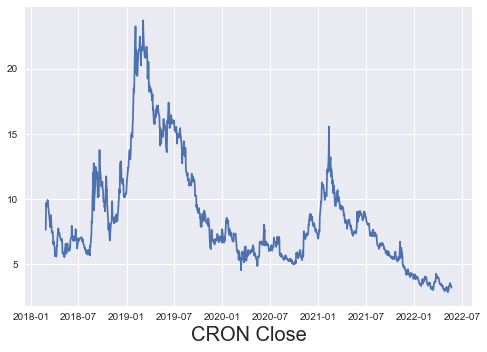

In [6]:
plt.plot(df_cron['cron_Close'])
plt.xlabel('CRON Close', fontsize=20)

## CRON and DJIX

In [7]:
df_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_dow.csv')
df_dow['Date'] = pd.to_datetime(df_dow['Date'])
df_dow = df_dow.set_index('Date')
df_dow

djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
1896-05-27      29.39      29.39     29.39       29.39          NaN   
1896-05-28      29.11      29.11     29.11       29.11          NaN   
1896-05-29      29.43      29.43     29.43       29.43          NaN   
1896-06-01      29.40      29.40     29.40       29.40          NaN   
1896-06-02      29.00      29.00     29.00       29.00          NaN   
...               ...        ...       ...         ...          ...   
2022-05-18   32468.67   32468.67  31393.95    31490.07  508465869.0   
2022-05-19   31262.62   31569.13  31016.41    31253.13  554268268.0   
2022-05-20   31426.94   31515.78  30635.76    31261.90  551025623.0   
2022-05-23   31395.89   31968.42  31395.89    31880.24  452693827.0   
2022-05-24   31717.61   32014.86  31365.59    31928.62  428081450.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
1896-05-27              NaN            29.11        NaN           NaN   
1896-05-28            29.39            29.43      -0.28     -0.009527   
1896-05-29            29.11            29.40       0.32      0.010993   
1896-06-01            29.43            29.00      -0.03     -0.001019   
1896-06-02            29.40            28.80      -0.40     -0.013605   
...                     ...              ...        ...           ...   
2022-05-18         32654.59         31253.13   -1164.52     -0.035662   
2022-05-19         31490.07         31261.90    -236.94     -0.007524   
2022-05-20         31253.13         31880.24       8.77      0.000281   
2022-05-23         31261.90         31928.62     618.34      0.019779   
2022-05-24         31880.24              NaN      48.38      0.001518   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
1896-05-27                  NaN                 NaN                   NaN   
1896-05-28                  NaN                 NaN                   NaN   
1896-05-29                  NaN                 NaN                   NaN   
1896-06-01                  NaN                 NaN                   NaN   
1896-06-02               29.266                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-18            32059.008             -68.808             32243.293   
2022-05-19            31963.574             -95.434             32068.809   
2022-05-20            31776.622            -186.952             31905.062   
2022-05-23            31707.986             -68.636             31868.516   
2022-05-24            31562.792            -145.194             31845.304   

            djix_10day_avg_diff  
Date                             
1896-05-27                  NaN  
1896-05-28                  NaN  
1896-05-29                  NaN  
1896-06-01                  NaN  
1896-06-02                  NaN  
...                         ...  
2022-05-18             -257.099  
2022-05-19             -174.484  
2022-05-20             -163.747  
2022-05-23              -36.546  
2022-05-24              -23.212  

[32641 rows x 13 columns]

In [8]:
df0 = pd.merge(df_cron, df_dow, on='Date', how='left')
df0

cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24      8.380     7.170        7.62      2801000   
2018-02-28       7.75      9.170     7.335        9.17      9875400   
2018-03-01       9.18     10.050     8.520        9.69     11858800   
2018-03-02       9.50      9.700     9.250        9.40      3325100   
2018-03-05       9.67     10.250     9.460        9.77      6488200   
...               ...        ...       ...         ...          ...   
2022-05-17       3.51      3.610     3.430        3.54      1653200   
2022-05-18       3.52      3.535     3.315        3.32      1256600   
2022-05-19       3.32      3.495     3.280        3.42      1582400   
2022-05-20       3.47      3.540     3.280        3.39      1197100   
2022-05-23       3.43      3.442     3.170        3.18      1228100   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-02-27              NaN             9.17        NaN           NaN   
2018-02-28             7.62             9.69       1.55      0.203412   
2018-03-01             9.17             9.40       0.52      0.056707   
2018-03-02             9.69             9.77      -0.29     -0.029928   
2018-03-05             9.40             9.91       0.37      0.039362   
...                     ...              ...        ...           ...   
2022-05-17             3.43             3.32       0.11      0.032070   
2022-05-18             3.54             3.42      -0.22     -0.062147   
2022-05-19             3.32             3.39       0.10      0.030120   
2022-05-20             3.42             3.18      -0.03     -0.008772   
2022-05-23             3.39              NaN      -0.21     -0.061947   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                  NaN                 NaN                   NaN   
2018-02-28                  NaN                 NaN                   NaN   
2018-03-01                  NaN                 NaN                   NaN   
2018-03-02                  NaN                 NaN                   NaN   
2018-03-05                9.130                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-17                3.262               0.072                 3.153   
2022-05-18                3.330               0.068                 3.161   
2022-05-19                3.396               0.066                 3.202   
2022-05-20                3.420               0.024                 3.245   
2022-05-23                3.370              -0.050                 3.280   

            cron_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2018-02-27                  NaN   25735.78   25800.35  25407.83    25410.03   
2018-02-28                  NaN   25485.15   25576.15  25022.42    25029.20   
2018-03-01                  NaN   25024.04   25185.35  24442.56    24608.98   
2018-03-02                  NaN   24394.91   24592.46  24217.76    24538.06   
2018-03-05                  NaN   24471.31   24961.00  24387.15    24874.76   
...                         ...        ...        ...       ...         ...   
2022-05-17                0.046   32427.00   32689.14  32308.15    32654.59   
2022-05-18                0.008   32468.67   32468.67  31393.95    31490.07   
2022-05-19                0.041   31262.62   31569.13  31016.41    31253.13   
2022-05-20                0.043   31426.94   31515.78  30635.76    31261.90   
2022-05-23                0.035   31395.89   31968.42  31395.89    31880.24   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                

In [9]:
df_isna0 = df0.isna()
df_isna0

cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27      False      False     False       False        False   
2018-02-28      False      False     False       False        False   
2018-03-01      False      False     False       False        False   
2018-03-02      False      False     False       False        False   
2018-03-05      False      False     False       False        False   
...               ...        ...       ...         ...          ...   
2022-05-17      False      False     False       False        False   
2022-05-18      False      False     False       False        False   
2022-05-19      False      False     False       False        False   
2022-05-20      False      False     False       False        False   
2022-05-23      False      False     False       False        False   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-02-27             True            False       True          True   
2018-02-28            False            False      False         False   
2018-03-01            False            False      False         False   
2018-03-02            False            False      False         False   
2018-03-05            False            False      False         False   
...                     ...              ...        ...           ...   
2022-05-17            False            False      False         False   
2022-05-18            False            False      False         False   
2022-05-19            False            False      False         False   
2022-05-20            False            False      False         False   
2022-05-23            False             True      False         False   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                 True                True                  True   
2018-02-28                 True                True                  True   
2018-03-01                 True                True                  True   
2018-03-02                 True                True                  True   
2018-03-05                False                True                  True   
...                         ...                 ...                   ...   
2022-05-17                False               False                 False   
2022-05-18                False               False                 False   
2022-05-19                False               False                 False   
2022-05-20                False               False                 False   
2022-05-23                False               False                 False   

            cron_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2018-02-27                 True      False      False     False       False   
2018-02-28                 True      False      False     False       False   
2018-03-01                 True      False      False     False       False   
2018-03-02                 True      False      False     False       False   
2018-03-05                 True      False      False     False       False   
...                         ...        ...        ...       ...         ...   
2022-05-17                False      False      False     False       False   
2022-05-18                False      False      False     False       False   
2022-05-19                False      False      False     False       False   
2022-05-20                False      False      False     False       False   
2022-05-23                False      False      False     False       False   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                

In [10]:
df_isna0 = df_isna0.add_suffix('_b')

In [11]:
df0 = df0.fillna(0)
df0.head()

cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24       8.38     7.170        7.62      2801000   
2018-02-28       7.75       9.17     7.335        9.17      9875400   
2018-03-01       9.18      10.05     8.520        9.69     11858800   
2018-03-02       9.50       9.70     9.250        9.40      3325100   
2018-03-05       9.67      10.25     9.460        9.77      6488200   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-02-27             0.00             9.17       0.00      0.000000   
2018-02-28             7.62             9.69       1.55      0.203412   
2018-03-01             9.17             9.40       0.52      0.056707   
2018-03-02             9.69             9.77      -0.29     -0.029928   
2018-03-05             9.40             9.91       0.37      0.039362   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                 0.00                 0.0                   0.0   
2018-02-28                 0.00                 0.0                   0.0   
2018-03-01                 0.00                 0.0                   0.0   
2018-03-02                 0.00                 0.0                   0.0   
2018-03-05                 9.13                 0.0                   0.0   

            cron_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2018-02-27                  0.0   25735.78   25800.35  25407.83    25410.03   
2018-02-28                  0.0   25485.15   25576.15  25022.42    25029.20   
2018-03-01                  0.0   25024.04   25185.35  24442.56    24608.98   
2018-03-02                  0.0   24394.91   24592.46  24217.76    24538.06   
2018-03-05                  0.0   24471.31   24961.00  24387.15    24874.76   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2018-02-27  438308772.0         25709.27         25029.20    -299.24   
2018-02-28  451844482.0         25410.03         24608.98    -380.83   
2018-03-01  506306593.0         25029.20         24538.06    -420.22   
2018-03-02  437110946.0         24608.98         24874.76     -70.92   
2018-03-05  383880485.0         24538.06         24884.12     336.70   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2018-02-27     -0.011639            25237.910              89.056   
2018-02-28     -0.014987            25284.194              46.284   
2018-03-01     -0.016789            25213.494             -70.700   
2018-03-02     -0.002882            25059.108            -154.386   
2018-03-05      0.013722            24892.206            -166.902   

            djix_10day_avg_close  djix_10day_avg_diff  
Date                                                   
2018-02-27             25110.799               80.876  
2018-02-28             25149.674               38.875  
2018-03-01             25121.223              -28.451  
2018-03-02             25054.992              -66.231  
2018-03-05             25020.530              -34.462

In [12]:
df0 = pd.concat([df0, df_isna0], axis=1)
df0

cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24      8.380     7.170        7.62      2801000   
2018-02-28       7.75      9.170     7.335        9.17      9875400   
2018-03-01       9.18     10.050     8.520        9.69     11858800   
2018-03-02       9.50      9.700     9.250        9.40      3325100   
2018-03-05       9.67     10.250     9.460        9.77      6488200   
...               ...        ...       ...         ...          ...   
2022-05-17       3.51      3.610     3.430        3.54      1653200   
2022-05-18       3.52      3.535     3.315        3.32      1256600   
2022-05-19       3.32      3.495     3.280        3.42      1582400   
2022-05-20       3.47      3.540     3.280        3.39      1197100   
2022-05-23       3.43      3.442     3.170        3.18      1228100   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-02-27             0.00             9.17       0.00      0.000000   
2018-02-28             7.62             9.69       1.55      0.203412   
2018-03-01             9.17             9.40       0.52      0.056707   
2018-03-02             9.69             9.77      -0.29     -0.029928   
2018-03-05             9.40             9.91       0.37      0.039362   
...                     ...              ...        ...           ...   
2022-05-17             3.43             3.32       0.11      0.032070   
2022-05-18             3.54             3.42      -0.22     -0.062147   
2022-05-19             3.32             3.39       0.10      0.030120   
2022-05-20             3.42             3.18      -0.03     -0.008772   
2022-05-23             3.39             0.00      -0.21     -0.061947   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                0.000               0.000                 0.000   
2018-02-28                0.000               0.000                 0.000   
2018-03-01                0.000               0.000                 0.000   
2018-03-02                0.000               0.000                 0.000   
2018-03-05                9.130               0.000                 0.000   
...                         ...                 ...                   ...   
2022-05-17                3.262               0.072                 3.153   
2022-05-18                3.330               0.068                 3.161   
2022-05-19                3.396               0.066                 3.202   
2022-05-20                3.420               0.024                 3.245   
2022-05-23                3.370              -0.050                 3.280   

            cron_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2018-02-27                0.000   25735.78   25800.35  25407.83    25410.03   
2018-02-28                0.000   25485.15   25576.15  25022.42    25029.20   
2018-03-01                0.000   25024.04   25185.35  24442.56    24608.98   
2018-03-02                0.000   24394.91   24592.46  24217.76    24538.06   
2018-03-05                0.000   24471.31   24961.00  24387.15    24874.76   
...                         ...        ...        ...       ...         ...   
2022-05-17                0.046   32427.00   32689.14  32308.15    32654.59   
2022-05-18                0.008   32468.67   32468.67  31393.95    31490.07   
2022-05-19                0.041   31262.62   31569.13  31016.41    31253.13   
2022-05-20                0.043   31426.94   31515.78  30635.76    31261.90   
2022-05-23                0.035   31395.89   31968.42  31395.89    31880.24   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                

In [13]:
df0['month'] = df0.index.month
df0['day'] = df0.index.day
df0['year'] = df0.index.year
df0['quarter'] = (df0['month']-1)//3 + 1

In [14]:
cols = df0.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cron_Open']

In [15]:
df0 = df0[cols].copy()
df0.head()

month  day  year  quarter  cron_Open  cron_High  cron_Low  \
Date                                                                    
2018-02-27      2   27  2018        1       8.24       8.38     7.170   
2018-02-28      2   28  2018        1       7.75       9.17     7.335   
2018-03-01      3    1  2018        1       9.18      10.05     8.520   
2018-03-02      3    2  2018        1       9.50       9.70     9.250   
2018-03-05      3    5  2018        1       9.67      10.25     9.460   

            cron_Close  cron_Volume  cron_prev_close  cron_next_close  \
Date                                                                    
2018-02-27        7.62      2801000             0.00             9.17   
2018-02-28        9.17      9875400             7.62             9.69   
2018-03-01        9.69     11858800             9.17             9.40   
2018-03-02        9.40      3325100             9.69             9.77   
2018-03-05        9.77      6488200             9.40             9.91   

            cron_diff  cron_%change  cron_5day_avg_close  cron_5day_avg_diff  \
Date                                                                           
2018-02-27       0.00      0.000000                 0.00                 0.0   
2018-02-28       1.55      0.203412                 0.00                 0.0   
2018-03-01       0.52      0.056707                 0.00                 0.0   
2018-03-02      -0.29     -0.029928                 0.00                 0.0   
2018-03-05       0.37      0.039362                 9.13                 0.0   

            cron_10day_avg_close  cron_10day_avg_diff  djix_Open  djix_High  \
Date                                                                          
2018-02-27                   0.0                  0.0   25735.78   25800.35   
2018-02-28                   0.0                  0.0   25485.15   25576.15   
2018-03-01                   0.0                  0.0   25024.04   25185.35   
2018-03-02                   0.0                  0.0   24394.91   24592.46   
2018-03-05                   0.0                  0.0   24471.31   24961.00   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2018-02-27  25407.83    25410.03  438308772.0         25709.27   
2018-02-28  25022.42    25029.20  451844482.0         25410.03   
2018-03-01  24442.56    24608.98  506306593.0         25029.20   
2018-03-02  24217.76    24538.06  437110946.0         24608.98   
2018-03-05  24387.15    24874.76  383880485.0         24538.06   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2018-02-27         25029.20    -299.24     -0.011639            25237.910   
2018-02-28         24608.98    -380.83     -0.014987            25284.194   
2018-03-01         24538.06    -420.22     -0.016789            25213.494   
2018-03-02         24874.76     -70.92     -0.002882            25059.108   
2018-03-05         24884.12     336.70      0.013722            24892.206   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2018-02-27              89.056             25110.799               80.876   
2018-02-28              46.284             25149.674               38.875   
2018-03-01             -70.700             25121.223              -28.451   
2018-03-02            -154.386             25054.992              -66.231   
2018-03-05            -166.902             25020.530              -34.462   

            cron_Open_b  cron_High_b  cron_Low_b  cron_Close_b  cron_Volume_b  \
Date                                                                            
2018-02-27        False        False       False         False          False   
2018-02-28        False        False       False         False          False   
2018-0

In [16]:
df0.drop(df0.tail(1).index, inplace=True)

In [17]:
df0.shape

(1067, 56)

In [18]:
n = int(len(df0) * 0.9)
n

960

In [19]:
train0 = df0[:n]
test0 = df0[n:]

In [20]:
print(len(train0))
print(len(test0))

960
107


In [21]:
X_train0 = train0.drop('cron_next_close', axis=1)
X_train0.head(3)

month  day  year  quarter  cron_Open  cron_High  cron_Low  \
Date                                                                    
2018-02-27      2   27  2018        1       8.24       8.38     7.170   
2018-02-28      2   28  2018        1       7.75       9.17     7.335   
2018-03-01      3    1  2018        1       9.18      10.05     8.520   

            cron_Close  cron_Volume  cron_prev_close  cron_diff  cron_%change  \
Date                                                                            
2018-02-27        7.62      2801000             0.00       0.00      0.000000   
2018-02-28        9.17      9875400             7.62       1.55      0.203412   
2018-03-01        9.69     11858800             9.17       0.52      0.056707   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                  0.0                 0.0                   0.0   
2018-02-28                  0.0                 0.0                   0.0   
2018-03-01                  0.0                 0.0                   0.0   

            cron_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2018-02-27                  0.0   25735.78   25800.35  25407.83    25410.03   
2018-02-28                  0.0   25485.15   25576.15  25022.42    25029.20   
2018-03-01                  0.0   25024.04   25185.35  24442.56    24608.98   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2018-02-27  438308772.0         25709.27         25029.20    -299.24   
2018-02-28  451844482.0         25410.03         24608.98    -380.83   
2018-03-01  506306593.0         25029.20         24538.06    -420.22   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2018-02-27     -0.011639            25237.910              89.056   
2018-02-28     -0.014987            25284.194              46.284   
2018-03-01     -0.016789            25213.494             -70.700   

            djix_10day_avg_close  djix_10day_avg_diff  cron_Open_b  \
Date                                                                 
2018-02-27             25110.799               80.876        False   
2018-02-28             25149.674               38.875        False   
2018-03-01             25121.223              -28.451        False   

            cron_High_b  cron_Low_b  cron_Close_b  cron_Volume_b  \
Date                                                               
2018-02-27        False       False         False          False   
2018-02-28        False       False         False          False   
2018-03-01        False       False         False          False   

            cron_prev_close_b  cron_next_close_b  cron_diff_b  cron_%change_b  \
Date                                                                            
2018-02-27               True              False         True            True   
2018-02-28              False              False        False           False   
2018-03-01              False              False        False           False   

            cron_5day_avg_close_b  cron_5day_avg_diff_b  \
Date                                                      
2018-02-27                   True                  True   
2018-02-28                   True                  True   
2018-03-01                   True                  True   

            cron_10day_avg_close_b  cron_10day_avg_diff_b  djix_Open_b  \
Date                                                                     
2018-02-27                    True                   True        False   
2018-02-28                    True                   True        False   
2018-03-01                    True                   True    

In [22]:
X_train0.shape

(960, 55)

In [23]:
y_train0 = train0['cron_next_close']
y_train0.head(3)

Date
2018-02-27    9.17
2018-02-28    9.69
2018-03-01    9.40
Name: cron_next_close, dtype: float64

In [24]:
y_train0.tail(3)

Date
2021-12-14    4.11
2021-12-15    3.99
2021-12-16    4.31
Name: cron_next_close, dtype: float64

In [25]:
X_test0 = test0.drop('cron_next_close', axis=1)
y_test0 = test0['cron_next_close']

In [26]:
X_test0.head(3)

month  day  year  quarter  cron_Open  cron_High  cron_Low  \
Date                                                                    
2021-12-17     12   17  2021        4       3.94       4.34      3.90   
2021-12-20     12   20  2021        4       4.10       4.23      4.02   
2021-12-21     12   21  2021        4       4.10       4.35      4.08   

            cron_Close  cron_Volume  cron_prev_close  cron_diff  cron_%change  \
Date                                                                            
2021-12-17        4.31      3251300             3.99       0.32      0.080201   
2021-12-20        4.10      2159400             4.31      -0.21     -0.048724   
2021-12-21        4.27      2317000             4.10       0.17      0.041463   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-17                4.130               0.010                 4.283   
2021-12-20                4.118              -0.012                 4.261   
2021-12-21                4.156               0.038                 4.237   

            cron_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2021-12-17                0.015   35800.11   35800.11  35284.26    35365.44   
2021-12-20               -0.022   35222.12   35222.12  34665.50    34932.16   
2021-12-21               -0.024   35069.50   35508.96  35069.50    35492.70   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2021-12-17  896157975.0         35897.64         34932.16    -532.20   
2021-12-20  462936403.0         35365.44         35492.70    -433.28   
2021-12-21  438602980.0         34932.16         35753.89     560.54   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2021-12-17     -0.014825            35677.128            -121.110   
2021-12-20     -0.012252            35533.370            -143.758   
2021-12-21      0.016047            35523.074             -10.296   

            djix_10day_avg_close  djix_10day_avg_diff  cron_Open_b  \
Date                                                                 
2021-12-17             35681.253               78.536        False   
2021-12-20             35651.766              -29.487        False   
2021-12-21             35629.093              -22.673        False   

            cron_High_b  cron_Low_b  cron_Close_b  cron_Volume_b  \
Date                                                               
2021-12-17        False       False         False          False   
2021-12-20        False       False         False          False   
2021-12-21        False       False         False          False   

            cron_prev_close_b  cron_next_close_b  cron_diff_b  cron_%change_b  \
Date                                                                            
2021-12-17              False              False        False           False   
2021-12-20              False              False        False           False   
2021-12-21              False              False        False           False   

            cron_5day_avg_close_b  cron_5day_avg_diff_b  \
Date                                                      
2021-12-17                  False                 False   
2021-12-20                  False                 False   
2021-12-21                  False                 False   

            cron_10day_avg_close_b  cron_10day_avg_diff_b  djix_Open_b  \
Date                                                                     
2021-12-17                   False                  False        False   
2021-12-20                   False                  False        False   
2021-12-21                   False                  False    

In [27]:
X_test0.shape

(107, 55)

In [28]:
y_test0.tail(3)

Date
2022-05-18    3.42
2022-05-19    3.39
2022-05-20    3.18
Name: cron_next_close, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression
hyper_table = list()

In [30]:
model0 = LinearRegression()
model0.fit(X_train0, y_train0)
y_pred0 = model0.predict(X_test0)

In [31]:
y_pred0[:5]

array([4.20993694, 4.21761285, 4.44043394, 4.22735827, 4.33819115])

In [32]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man0 = rmse_manual(y_test0, y_pred0)
print(rmse_man0)

0.15263980913437802


In [33]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man0 = mae_manual(y_test0, y_pred0)
print(mae_man0)

0.11987396491233945


In [34]:
y_train0 = pd.DataFrame(y_train0, columns=['cron_next_close'])
y_test0 = pd.DataFrame(y_test0, columns=['cron_next_close'])

In [35]:
y_test0['cron_pred_next_close'] = y_pred0

In [36]:
y_test0.tail()

cron_next_close  cron_pred_next_close
Date                                             
2022-05-16             3.54              3.601923
2022-05-17             3.32              3.113576
2022-05-18             3.42              3.103032
2022-05-19             3.39              3.466274
2022-05-20             3.18              3.536645

In [37]:
hyper_table.append(dict(stock='cron', 
                        version='1+Dow',
                        model=model0, 
                        rmse=rmse_man0,
                        mae=mae_man0,
                        actual_price=y_test0['cron_next_close'][-1],
                        predicted_price=y_test0['cron_pred_next_close'][-1],
                        rows=df0.shape[0], 
                        train_rows=X_train0.shape[0],
                        test_rows=X_test0.shape[0],
                        columns=df0.shape[1]))

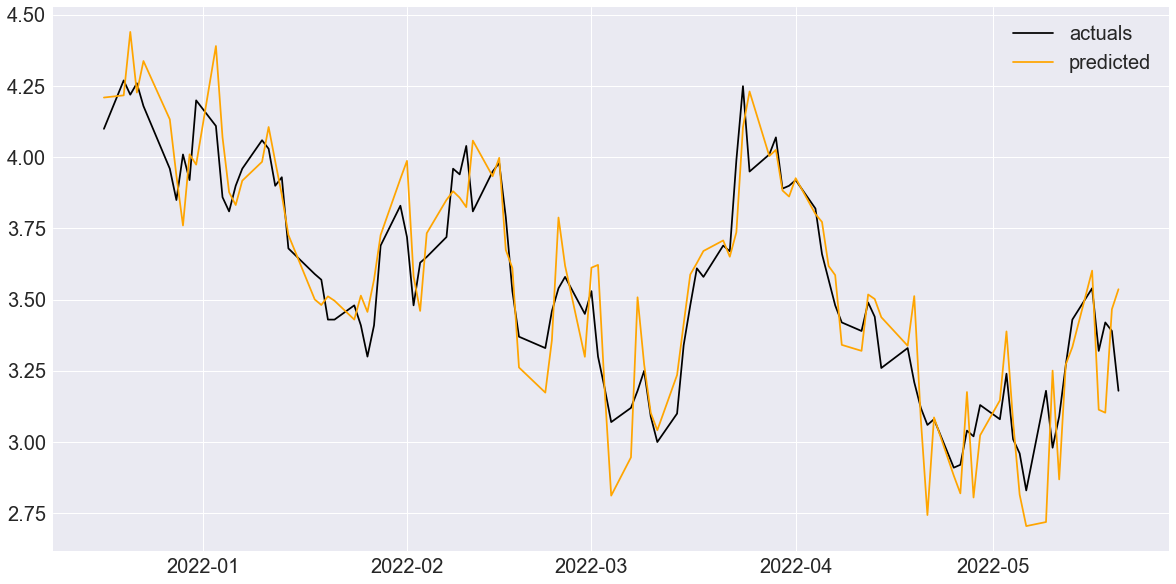

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test0['cron_next_close'], color='black')
ax.plot(y_test0['cron_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## CRON and Cannabis ETFs

In [39]:
df_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs.csv')
df_etfs['Date'] = pd.to_datetime(df_etfs['Date'])
df_etfs = df_etfs.set_index('Date')

In [40]:
df1 = pd.merge(df_cron, df_etfs, on='Date', how='left')
df1

cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24      8.380     7.170        7.62      2801000   
2018-02-28       7.75      9.170     7.335        9.17      9875400   
2018-03-01       9.18     10.050     8.520        9.69     11858800   
2018-03-02       9.50      9.700     9.250        9.40      3325100   
2018-03-05       9.67     10.250     9.460        9.77      6488200   
...               ...        ...       ...         ...          ...   
2022-05-17       3.51      3.610     3.430        3.54      1653200   
2022-05-18       3.52      3.535     3.315        3.32      1256600   
2022-05-19       3.32      3.495     3.280        3.42      1582400   
2022-05-20       3.47      3.540     3.280        3.39      1197100   
2022-05-23       3.43      3.442     3.170        3.18      1228100   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-02-27              NaN             9.17        NaN           NaN   
2018-02-28             7.62             9.69       1.55      0.203412   
2018-03-01             9.17             9.40       0.52      0.056707   
2018-03-02             9.69             9.77      -0.29     -0.029928   
2018-03-05             9.40             9.91       0.37      0.039362   
...                     ...              ...        ...           ...   
2022-05-17             3.43             3.32       0.11      0.032070   
2022-05-18             3.54             3.42      -0.22     -0.062147   
2022-05-19             3.32             3.39       0.10      0.030120   
2022-05-20             3.42             3.18      -0.03     -0.008772   
2022-05-23             3.39              NaN      -0.21     -0.061947   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                  NaN                 NaN                   NaN   
2018-02-28                  NaN                 NaN                   NaN   
2018-03-01                  NaN                 NaN                   NaN   
2018-03-02                  NaN                 NaN                   NaN   
2018-03-05                9.130                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-17                3.262               0.072                 3.153   
2022-05-18                3.330               0.068                 3.161   
2022-05-19                3.396               0.066                 3.202   
2022-05-20                3.420               0.024                 3.245   
2022-05-23                3.370              -0.050                 3.280   

            cron_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-02-27                  NaN  32.020000  32.180000  30.573000  30.850000   
2018-02-28                  NaN  30.910000  31.959999  30.680000  31.799999   
2018-03-01                  NaN  31.799999  32.580002  31.500000  32.480000   
2018-03-02                  NaN  32.099998  32.549999  31.885000  32.439999   
2018-03-05                  NaN  32.340000  33.400002  32.327999  33.310001   
...                         ...        ...        ...        ...        ...   
2022-05-17                0.046   7.990000   8.170000   7.880000   8.100000   
2022-05-18                0.008   7.940000   8.030000   7.605000   7.620000   
2022-05-19                0.041   7.560000   7.860000   7.540000   7.780000   
2022-05-20                0.043   7.860000   7.860000   7.420000   7.600000   
2022-05-23                0.035   7.620000   7.640000   7.409000   7.460000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                           

In [41]:
df_isna1 = df1.isna()
df_isna1

cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27      False      False     False       False        False   
2018-02-28      False      False     False       False        False   
2018-03-01      False      False     False       False        False   
2018-03-02      False      False     False       False        False   
2018-03-05      False      False     False       False        False   
...               ...        ...       ...         ...          ...   
2022-05-17      False      False     False       False        False   
2022-05-18      False      False     False       False        False   
2022-05-19      False      False     False       False        False   
2022-05-20      False      False     False       False        False   
2022-05-23      False      False     False       False        False   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-02-27             True            False       True          True   
2018-02-28            False            False      False         False   
2018-03-01            False            False      False         False   
2018-03-02            False            False      False         False   
2018-03-05            False            False      False         False   
...                     ...              ...        ...           ...   
2022-05-17            False            False      False         False   
2022-05-18            False            False      False         False   
2022-05-19            False            False      False         False   
2022-05-20            False            False      False         False   
2022-05-23            False             True      False         False   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                 True                True                  True   
2018-02-28                 True                True                  True   
2018-03-01                 True                True                  True   
2018-03-02                 True                True                  True   
2018-03-05                False                True                  True   
...                         ...                 ...                   ...   
2022-05-17                False               False                 False   
2022-05-18                False               False                 False   
2022-05-19                False               False                 False   
2022-05-20                False               False                 False   
2022-05-23                False               False                 False   

            cron_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                  
2018-02-27                 True    False    False   False     False   
2018-02-28                 True    False    False   False     False   
2018-03-01                 True    False    False   False     False   
2018-03-02                 True    False    False   False     False   
2018-03-05                 True    False    False   False     False   
...                         ...      ...      ...     ...       ...   
2022-05-17                False    False    False   False     False   
2022-05-18                False    False    False   False     False   
2022-05-19                False    False    False   False     False   
2022-05-20                False    False    False   False     False   
2022-05-23                False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                                       
2018-02-27      False          False          False    False

In [42]:
df_isna1 = df_isna1.add_suffix('_b')

In [43]:
df1 = df1.fillna(0)
df1.head()

cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24       8.38     7.170        7.62      2801000   
2018-02-28       7.75       9.17     7.335        9.17      9875400   
2018-03-01       9.18      10.05     8.520        9.69     11858800   
2018-03-02       9.50       9.70     9.250        9.40      3325100   
2018-03-05       9.67      10.25     9.460        9.77      6488200   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-02-27             0.00             9.17       0.00      0.000000   
2018-02-28             7.62             9.69       1.55      0.203412   
2018-03-01             9.17             9.40       0.52      0.056707   
2018-03-02             9.69             9.77      -0.29     -0.029928   
2018-03-05             9.40             9.91       0.37      0.039362   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                 0.00                 0.0                   0.0   
2018-02-28                 0.00                 0.0                   0.0   
2018-03-01                 0.00                 0.0                   0.0   
2018-03-02                 0.00                 0.0                   0.0   
2018-03-05                 9.13                 0.0                   0.0   

            cron_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-02-27                  0.0  32.020000  32.180000  30.573000  30.850000   
2018-02-28                  0.0  30.910000  31.959999  30.680000  31.799999   
2018-03-01                  0.0  31.799999  32.580002  31.500000  32.480000   
2018-03-02                  0.0  32.099998  32.549999  31.885000  32.439999   
2018-03-05                  0.0  32.340000  33.400002  32.327999  33.310001   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-02-27     562300      31.959999      31.799999 -1.109999   -0.034731   
2018-02-28     336900      30.850000      32.480000  0.949999    0.030794   
2018-03-01     308100      31.799999      32.439999  0.680001    0.021384   
2018-03-02     155900      32.480000      33.310001 -0.040001   -0.001232   
2018-03-05     275400      32.439999      33.730000  0.870002    0.026819   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-02-27          31.881999            -0.374           32.335999   
2018-02-28          31.741999            -0.140           32.278999   
2018-03-01          31.809999             0.068           32.209999   
2018-03-02          31.905999             0.096           32.123999   
2018-03-05          32.176000             0.270           32.216000   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-02-27             -0.155        0.0        0.0       0.0         0.0   
2018-02-28             -0.057        0.0        0.0       0.0         0.0   
2018-03-01             -0.069        0.0        0.0       0.0         0.0   
2018-03-02             -0.086        0.0        0.0       0.0         0.0   
2018-03-05              0.092        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-02-27          0.0              0.0              0.0        0.0   
2018-02-28          0.0              0.0              0.0        0.0   
2018-03-01          0.0              0.0  

In [44]:
df1 = pd.concat([df1, df_isna1], axis=1)
df1

cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24      8.380     7.170        7.62      2801000   
2018-02-28       7.75      9.170     7.335        9.17      9875400   
2018-03-01       9.18     10.050     8.520        9.69     11858800   
2018-03-02       9.50      9.700     9.250        9.40      3325100   
2018-03-05       9.67     10.250     9.460        9.77      6488200   
...               ...        ...       ...         ...          ...   
2022-05-17       3.51      3.610     3.430        3.54      1653200   
2022-05-18       3.52      3.535     3.315        3.32      1256600   
2022-05-19       3.32      3.495     3.280        3.42      1582400   
2022-05-20       3.47      3.540     3.280        3.39      1197100   
2022-05-23       3.43      3.442     3.170        3.18      1228100   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-02-27             0.00             9.17       0.00      0.000000   
2018-02-28             7.62             9.69       1.55      0.203412   
2018-03-01             9.17             9.40       0.52      0.056707   
2018-03-02             9.69             9.77      -0.29     -0.029928   
2018-03-05             9.40             9.91       0.37      0.039362   
...                     ...              ...        ...           ...   
2022-05-17             3.43             3.32       0.11      0.032070   
2022-05-18             3.54             3.42      -0.22     -0.062147   
2022-05-19             3.32             3.39       0.10      0.030120   
2022-05-20             3.42             3.18      -0.03     -0.008772   
2022-05-23             3.39             0.00      -0.21     -0.061947   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                0.000               0.000                 0.000   
2018-02-28                0.000               0.000                 0.000   
2018-03-01                0.000               0.000                 0.000   
2018-03-02                0.000               0.000                 0.000   
2018-03-05                9.130               0.000                 0.000   
...                         ...                 ...                   ...   
2022-05-17                3.262               0.072                 3.153   
2022-05-18                3.330               0.068                 3.161   
2022-05-19                3.396               0.066                 3.202   
2022-05-20                3.420               0.024                 3.245   
2022-05-23                3.370              -0.050                 3.280   

            cron_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-02-27                0.000  32.020000  32.180000  30.573000  30.850000   
2018-02-28                0.000  30.910000  31.959999  30.680000  31.799999   
2018-03-01                0.000  31.799999  32.580002  31.500000  32.480000   
2018-03-02                0.000  32.099998  32.549999  31.885000  32.439999   
2018-03-05                0.000  32.340000  33.400002  32.327999  33.310001   
...                         ...        ...        ...        ...        ...   
2022-05-17                0.046   7.990000   8.170000   7.880000   8.100000   
2022-05-18                0.008   7.940000   8.030000   7.605000   7.620000   
2022-05-19                0.041   7.560000   7.860000   7.540000   7.780000   
2022-05-20                0.043   7.860000   7.860000   7.420000   7.600000   
2022-05-23                0.035   7.620000   7.640000   7.409000   7.460000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                           

In [45]:
df1['month'] = df1.index.month
df1['day'] = df1.index.day
df1['year'] = df1.index.year
df1['quarter'] = (df1['month']-1)//3 + 1

In [46]:
cols = df1.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cron_Open']

In [47]:
df1 = df1[cols].copy()
df1

month  day  year  quarter  cron_Open  cron_High  cron_Low  \
Date                                                                    
2018-02-27      2   27  2018        1       8.24      8.380     7.170   
2018-02-28      2   28  2018        1       7.75      9.170     7.335   
2018-03-01      3    1  2018        1       9.18     10.050     8.520   
2018-03-02      3    2  2018        1       9.50      9.700     9.250   
2018-03-05      3    5  2018        1       9.67     10.250     9.460   
...           ...  ...   ...      ...        ...        ...       ...   
2022-05-17      5   17  2022        2       3.51      3.610     3.430   
2022-05-18      5   18  2022        2       3.52      3.535     3.315   
2022-05-19      5   19  2022        2       3.32      3.495     3.280   
2022-05-20      5   20  2022        2       3.47      3.540     3.280   
2022-05-23      5   23  2022        2       3.43      3.442     3.170   

            cron_Close  cron_Volume  cron_prev_close  cron_next_close  \
Date                                                                    
2018-02-27        7.62      2801000             0.00             9.17   
2018-02-28        9.17      9875400             7.62             9.69   
2018-03-01        9.69     11858800             9.17             9.40   
2018-03-02        9.40      3325100             9.69             9.77   
2018-03-05        9.77      6488200             9.40             9.91   
...                ...          ...              ...              ...   
2022-05-17        3.54      1653200             3.43             3.32   
2022-05-18        3.32      1256600             3.54             3.42   
2022-05-19        3.42      1582400             3.32             3.39   
2022-05-20        3.39      1197100             3.42             3.18   
2022-05-23        3.18      1228100             3.39             0.00   

            cron_diff  cron_%change  cron_5day_avg_close  cron_5day_avg_diff  \
Date                                                                           
2018-02-27       0.00      0.000000                0.000               0.000   
2018-02-28       1.55      0.203412                0.000               0.000   
2018-03-01       0.52      0.056707                0.000               0.000   
2018-03-02      -0.29     -0.029928                0.000               0.000   
2018-03-05       0.37      0.039362                9.130               0.000   
...               ...           ...                  ...                 ...   
2022-05-17       0.11      0.032070                3.262               0.072   
2022-05-18      -0.22     -0.062147                3.330               0.068   
2022-05-19       0.10      0.030120                3.396               0.066   
2022-05-20      -0.03     -0.008772                3.420               0.024   
2022-05-23      -0.21     -0.061947                3.370              -0.050   

            cron_10day_avg_close  cron_10day_avg_diff    mj_Open    mj_High  \
Date                                                                          
2018-02-27                 0.000                0.000  32.020000  32.180000   
2018-02-28                 0.000                0.000  30.910000  31.959999   
2018-03-01                 0.000                0.000  31.799999  32.580002   
2018-03-02                 0.000                0.000  32.099998  32.549999   
2018-03-05                 0.000                0.000  32.340000  33.400002   
...                          ...                  ...        ...        ...   
2022-05-17                 3.153                0.046   7.990000   8.170000   
2022-05-18                 3.161                0.008   7.940000   8.030000   
2022-05-19                 3.202                0.041   7.560000   7.860000   
2022-05-20                 3.245                0.043   7.860000   7.860000   
2022-05-23                 3.280                0.035   7.620000   7.640000   

               mj_Low   mj_Close  mj_Volume

In [48]:
df1.drop(df1.tail(1).index, inplace=True)

In [49]:
n = int(len(df1) * 0.9)
n

960

In [50]:
train1 = df1[:n]
test1 = df1[n:]

In [51]:
print(len(train1))
print(len(test1))

960
107


In [52]:
X_train1 = train1.drop('cron_next_close', axis=1)
X_train1.head(3)

month  day  year  quarter  cron_Open  cron_High  cron_Low  \
Date                                                                    
2018-02-27      2   27  2018        1       8.24       8.38     7.170   
2018-02-28      2   28  2018        1       7.75       9.17     7.335   
2018-03-01      3    1  2018        1       9.18      10.05     8.520   

            cron_Close  cron_Volume  cron_prev_close  cron_diff  cron_%change  \
Date                                                                            
2018-02-27        7.62      2801000             0.00       0.00      0.000000   
2018-02-28        9.17      9875400             7.62       1.55      0.203412   
2018-03-01        9.69     11858800             9.17       0.52      0.056707   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                  0.0                 0.0                   0.0   
2018-02-28                  0.0                 0.0                   0.0   
2018-03-01                  0.0                 0.0                   0.0   

            cron_10day_avg_diff    mj_Open    mj_High  mj_Low   mj_Close  \
Date                                                                       
2018-02-27                  0.0  32.020000  32.180000  30.573  30.850000   
2018-02-28                  0.0  30.910000  31.959999  30.680  31.799999   
2018-03-01                  0.0  31.799999  32.580002  31.500  32.480000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-02-27     562300      31.959999      31.799999 -1.109999   -0.034731   
2018-02-28     336900      30.850000      32.480000  0.949999    0.030794   
2018-03-01     308100      31.799999      32.439999  0.680001    0.021384   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-02-27          31.881999            -0.374           32.335999   
2018-02-28          31.741999            -0.140           32.278999   
2018-03-01          31.809999             0.068           32.209999   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-02-27             -0.155        0.0        0.0       0.0         0.0   
2018-02-28             -0.057        0.0        0.0       0.0         0.0   
2018-03-01             -0.069        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-02-27          0.0              0.0              0.0        0.0   
2018-02-28          0.0              0.0              0.0        0.0   
2018-03-01          0.0              0.0              0.0        0.0   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2018-02-27           0.0                  0.0                 0.0   
2018-02-28           0.0                  0.0                 0.0   
2018-03-01           0.0                  0.0                 0.0   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2018-02-27                   0.0                  0.0        0.0        0.0   
2018-02-28                   0.0                  0.0        0.0        0.0   
2018-03-01                   0.0                  0.0        0.0        0.0   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2018-02-27       0.0         0.0          0.0              0.0   
2018-02-28       0.0         0.0          0.

In [53]:
X_train1.shape

(960, 159)

In [54]:
y_train1 = train1['cron_next_close']
y_train1.head(3)

Date
2018-02-27    9.17
2018-02-28    9.69
2018-03-01    9.40
Name: cron_next_close, dtype: float64

In [55]:
y_train1.tail(3)

Date
2021-12-14    4.11
2021-12-15    3.99
2021-12-16    4.31
Name: cron_next_close, dtype: float64

In [56]:
X_test1 = test1.drop('cron_next_close', axis=1)
y_test1 = test1['cron_next_close']

In [57]:
X_test1.head(3)

month  day  year  quarter  cron_Open  cron_High  cron_Low  \
Date                                                                    
2021-12-17     12   17  2021        4       3.94       4.34      3.90   
2021-12-20     12   20  2021        4       4.10       4.23      4.02   
2021-12-21     12   21  2021        4       4.10       4.35      4.08   

            cron_Close  cron_Volume  cron_prev_close  cron_diff  cron_%change  \
Date                                                                            
2021-12-17        4.31      3251300             3.99       0.32      0.080201   
2021-12-20        4.10      2159400             4.31      -0.21     -0.048724   
2021-12-21        4.27      2317000             4.10       0.17      0.041463   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-17                4.130               0.010                 4.283   
2021-12-20                4.118              -0.012                 4.261   
2021-12-21                4.156               0.038                 4.237   

            cron_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                  
2021-12-17                0.015    11.05   11.525  10.945     11.48   
2021-12-20               -0.022    11.11   11.230  10.930     11.08   
2021-12-21               -0.024    11.16   11.530  11.153     11.49   

            mj_Volume  mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                                       
2021-12-17    1342700          11.22          11.08     0.26    0.023173   
2021-12-20    1323500          11.48          11.49    -0.40   -0.034843   
2021-12-21    1215500          11.08          11.45     0.41    0.037004   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2021-12-17             11.350             0.006              11.556   
2021-12-20             11.256            -0.094              11.513   
2021-12-21             11.314             0.058              11.467   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2021-12-17              0.015     23.750     24.400     23.48   24.100000   
2021-12-20             -0.043     23.816     23.816     23.08   23.270000   
2021-12-21             -0.046     23.350     23.750     23.35   23.610001   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2021-12-17    1444300.0        24.110001        23.270000  -0.010001   
2021-12-20    1241200.0        24.100000        23.610001  -0.830000   
2021-12-21     851500.0        23.270000        24.559999   0.340001   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2021-12-17     -0.000415            24.408000              -0.392   
2021-12-20     -0.034440            24.086000              -0.322   
2021-12-21      0.014611            23.924001              -0.162   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2021-12-17                25.153               -0.239      12.71     13.238   
2021-12-20                24.986               -0.167      13.00     13.000   
2021-12-21                24.813               -0.173      12.69     13.100   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2021-12-17     12.57       13.19     118900.0            12.96   
2021-12-20     12.56       12.66     182000.0            13.19   
2021-12-

In [58]:
X_test1.shape

(107, 159)

In [59]:
y_test1.tail(3)

Date
2022-05-18    3.42
2022-05-19    3.39
2022-05-20    3.18
Name: cron_next_close, dtype: float64

In [60]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

In [61]:
y_pred1[:5]

array([4.15731778, 4.3422673 , 4.28464086, 4.49245137, 4.13987875])

In [62]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man1 = rmse_manual(y_test1, y_pred1)
print(rmse_man1)

0.1535768767559713


In [63]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man1 = mae_manual(y_test1, y_pred1)
print(mae_man1)

0.12840452681046827


In [64]:
y_train1 = pd.DataFrame(y_train1, columns=['cron_next_close'])
y_test1 = pd.DataFrame(y_test1, columns=['cron_next_close'])

In [65]:
y_test1['cron_pred_next_close'] = y_pred1

In [66]:
y_test1.tail()

cron_next_close  cron_pred_next_close
Date                                             
2022-05-16             3.54              3.766944
2022-05-17             3.32              3.205435
2022-05-18             3.42              3.667413
2022-05-19             3.39              3.587783
2022-05-20             3.18              3.678563

In [67]:
hyper_table.append(dict(stock='cron', 
                        version='1+ETFs',
                        model=model1, 
                        rmse=rmse_man1,
                        mae=mae_man1,
                        actual_price=y_test1['cron_next_close'][-1],
                        predicted_price=y_test1['cron_pred_next_close'][-1],
                        rows=df1.shape[0], 
                        train_rows=X_train1.shape[0],
                        test_rows=X_test1.shape[0],
                        columns=df1.shape[1]))

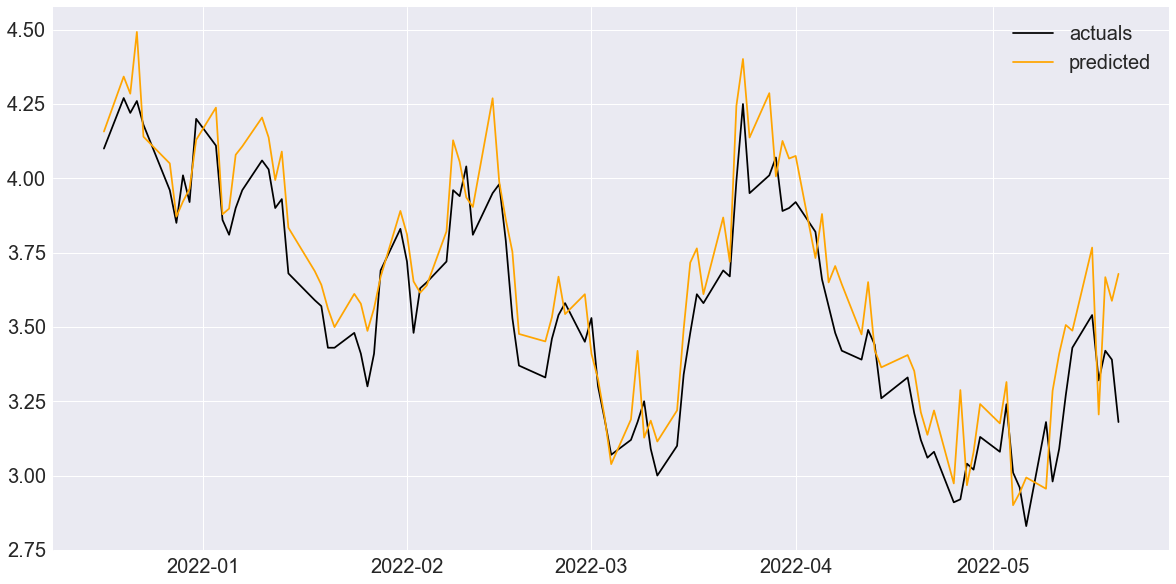

In [68]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test1['cron_next_close'], color='black')
ax.plot(y_test1['cron_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## CRON, Cannabis ETFs, and DJIX

In [69]:
df_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs_dow.csv')
df_etfs_dow['Date'] = pd.to_datetime(df_etfs_dow['Date'])
df_etfs_dow = df_etfs_dow.set_index('Date')

In [70]:
df2 = pd.merge(df_cron, df_etfs_dow, on='Date', how='left')
df2

cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24      8.380     7.170        7.62      2801000   
2018-02-28       7.75      9.170     7.335        9.17      9875400   
2018-03-01       9.18     10.050     8.520        9.69     11858800   
2018-03-02       9.50      9.700     9.250        9.40      3325100   
2018-03-05       9.67     10.250     9.460        9.77      6488200   
...               ...        ...       ...         ...          ...   
2022-05-17       3.51      3.610     3.430        3.54      1653200   
2022-05-18       3.52      3.535     3.315        3.32      1256600   
2022-05-19       3.32      3.495     3.280        3.42      1582400   
2022-05-20       3.47      3.540     3.280        3.39      1197100   
2022-05-23       3.43      3.442     3.170        3.18      1228100   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-02-27              NaN             9.17        NaN           NaN   
2018-02-28             7.62             9.69       1.55      0.203412   
2018-03-01             9.17             9.40       0.52      0.056707   
2018-03-02             9.69             9.77      -0.29     -0.029928   
2018-03-05             9.40             9.91       0.37      0.039362   
...                     ...              ...        ...           ...   
2022-05-17             3.43             3.32       0.11      0.032070   
2022-05-18             3.54             3.42      -0.22     -0.062147   
2022-05-19             3.32             3.39       0.10      0.030120   
2022-05-20             3.42             3.18      -0.03     -0.008772   
2022-05-23             3.39              NaN      -0.21     -0.061947   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                  NaN                 NaN                   NaN   
2018-02-28                  NaN                 NaN                   NaN   
2018-03-01                  NaN                 NaN                   NaN   
2018-03-02                  NaN                 NaN                   NaN   
2018-03-05                9.130                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-17                3.262               0.072                 3.153   
2022-05-18                3.330               0.068                 3.161   
2022-05-19                3.396               0.066                 3.202   
2022-05-20                3.420               0.024                 3.245   
2022-05-23                3.370              -0.050                 3.280   

            cron_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-02-27                  NaN  32.020000  32.180000  30.573000  30.850000   
2018-02-28                  NaN  30.910000  31.959999  30.680000  31.799999   
2018-03-01                  NaN  31.799999  32.580002  31.500000  32.480000   
2018-03-02                  NaN  32.099998  32.549999  31.885000  32.439999   
2018-03-05                  NaN  32.340000  33.400002  32.327999  33.310001   
...                         ...        ...        ...        ...        ...   
2022-05-17                0.046   7.990000   8.170000   7.880000   8.100000   
2022-05-18                0.008   7.940000   8.030000   7.605000   7.620000   
2022-05-19                0.041   7.560000   7.860000   7.540000   7.780000   
2022-05-20                0.043   7.860000   7.860000   7.420000   7.600000   
2022-05-23                0.035   7.620000   7.640000   7.409000   7.460000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                           

In [71]:
df_isna2 = df2.isna()
df_isna2

cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27      False      False     False       False        False   
2018-02-28      False      False     False       False        False   
2018-03-01      False      False     False       False        False   
2018-03-02      False      False     False       False        False   
2018-03-05      False      False     False       False        False   
...               ...        ...       ...         ...          ...   
2022-05-17      False      False     False       False        False   
2022-05-18      False      False     False       False        False   
2022-05-19      False      False     False       False        False   
2022-05-20      False      False     False       False        False   
2022-05-23      False      False     False       False        False   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-02-27             True            False       True          True   
2018-02-28            False            False      False         False   
2018-03-01            False            False      False         False   
2018-03-02            False            False      False         False   
2018-03-05            False            False      False         False   
...                     ...              ...        ...           ...   
2022-05-17            False            False      False         False   
2022-05-18            False            False      False         False   
2022-05-19            False            False      False         False   
2022-05-20            False            False      False         False   
2022-05-23            False             True      False         False   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                 True                True                  True   
2018-02-28                 True                True                  True   
2018-03-01                 True                True                  True   
2018-03-02                 True                True                  True   
2018-03-05                False                True                  True   
...                         ...                 ...                   ...   
2022-05-17                False               False                 False   
2022-05-18                False               False                 False   
2022-05-19                False               False                 False   
2022-05-20                False               False                 False   
2022-05-23                False               False                 False   

            cron_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                  
2018-02-27                 True    False    False   False     False   
2018-02-28                 True    False    False   False     False   
2018-03-01                 True    False    False   False     False   
2018-03-02                 True    False    False   False     False   
2018-03-05                 True    False    False   False     False   
...                         ...      ...      ...     ...       ...   
2022-05-17                False    False    False   False     False   
2022-05-18                False    False    False   False     False   
2022-05-19                False    False    False   False     False   
2022-05-20                False    False    False   False     False   
2022-05-23                False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                                       
2018-02-27      False          False          False    False

In [72]:
df_isna2 = df_isna2.add_suffix('_b')

In [73]:
df2 = df2.fillna(0)
df2.head()

cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24       8.38     7.170        7.62      2801000   
2018-02-28       7.75       9.17     7.335        9.17      9875400   
2018-03-01       9.18      10.05     8.520        9.69     11858800   
2018-03-02       9.50       9.70     9.250        9.40      3325100   
2018-03-05       9.67      10.25     9.460        9.77      6488200   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-02-27             0.00             9.17       0.00      0.000000   
2018-02-28             7.62             9.69       1.55      0.203412   
2018-03-01             9.17             9.40       0.52      0.056707   
2018-03-02             9.69             9.77      -0.29     -0.029928   
2018-03-05             9.40             9.91       0.37      0.039362   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                 0.00                 0.0                   0.0   
2018-02-28                 0.00                 0.0                   0.0   
2018-03-01                 0.00                 0.0                   0.0   
2018-03-02                 0.00                 0.0                   0.0   
2018-03-05                 9.13                 0.0                   0.0   

            cron_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-02-27                  0.0  32.020000  32.180000  30.573000  30.850000   
2018-02-28                  0.0  30.910000  31.959999  30.680000  31.799999   
2018-03-01                  0.0  31.799999  32.580002  31.500000  32.480000   
2018-03-02                  0.0  32.099998  32.549999  31.885000  32.439999   
2018-03-05                  0.0  32.340000  33.400002  32.327999  33.310001   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-02-27     562300      31.959999      31.799999 -1.109999   -0.034731   
2018-02-28     336900      30.850000      32.480000  0.949999    0.030794   
2018-03-01     308100      31.799999      32.439999  0.680001    0.021384   
2018-03-02     155900      32.480000      33.310001 -0.040001   -0.001232   
2018-03-05     275400      32.439999      33.730000  0.870002    0.026819   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-02-27          31.881999            -0.374           32.335999   
2018-02-28          31.741999            -0.140           32.278999   
2018-03-01          31.809999             0.068           32.209999   
2018-03-02          31.905999             0.096           32.123999   
2018-03-05          32.176000             0.270           32.216000   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-02-27             -0.155        0.0        0.0       0.0         0.0   
2018-02-28             -0.057        0.0        0.0       0.0         0.0   
2018-03-01             -0.069        0.0        0.0       0.0         0.0   
2018-03-02             -0.086        0.0        0.0       0.0         0.0   
2018-03-05              0.092        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-02-27          0.0              0.0              0.0        0.0   
2018-02-28          0.0              0.0              0.0        0.0   
2018-03-01          0.0              0.0  

In [74]:
df2 = pd.concat([df2, df_isna2], axis=1)
df2

cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24      8.380     7.170        7.62      2801000   
2018-02-28       7.75      9.170     7.335        9.17      9875400   
2018-03-01       9.18     10.050     8.520        9.69     11858800   
2018-03-02       9.50      9.700     9.250        9.40      3325100   
2018-03-05       9.67     10.250     9.460        9.77      6488200   
...               ...        ...       ...         ...          ...   
2022-05-17       3.51      3.610     3.430        3.54      1653200   
2022-05-18       3.52      3.535     3.315        3.32      1256600   
2022-05-19       3.32      3.495     3.280        3.42      1582400   
2022-05-20       3.47      3.540     3.280        3.39      1197100   
2022-05-23       3.43      3.442     3.170        3.18      1228100   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-02-27             0.00             9.17       0.00      0.000000   
2018-02-28             7.62             9.69       1.55      0.203412   
2018-03-01             9.17             9.40       0.52      0.056707   
2018-03-02             9.69             9.77      -0.29     -0.029928   
2018-03-05             9.40             9.91       0.37      0.039362   
...                     ...              ...        ...           ...   
2022-05-17             3.43             3.32       0.11      0.032070   
2022-05-18             3.54             3.42      -0.22     -0.062147   
2022-05-19             3.32             3.39       0.10      0.030120   
2022-05-20             3.42             3.18      -0.03     -0.008772   
2022-05-23             3.39             0.00      -0.21     -0.061947   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                0.000               0.000                 0.000   
2018-02-28                0.000               0.000                 0.000   
2018-03-01                0.000               0.000                 0.000   
2018-03-02                0.000               0.000                 0.000   
2018-03-05                9.130               0.000                 0.000   
...                         ...                 ...                   ...   
2022-05-17                3.262               0.072                 3.153   
2022-05-18                3.330               0.068                 3.161   
2022-05-19                3.396               0.066                 3.202   
2022-05-20                3.420               0.024                 3.245   
2022-05-23                3.370              -0.050                 3.280   

            cron_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-02-27                0.000  32.020000  32.180000  30.573000  30.850000   
2018-02-28                0.000  30.910000  31.959999  30.680000  31.799999   
2018-03-01                0.000  31.799999  32.580002  31.500000  32.480000   
2018-03-02                0.000  32.099998  32.549999  31.885000  32.439999   
2018-03-05                0.000  32.340000  33.400002  32.327999  33.310001   
...                         ...        ...        ...        ...        ...   
2022-05-17                0.046   7.990000   8.170000   7.880000   8.100000   
2022-05-18                0.008   7.940000   8.030000   7.605000   7.620000   
2022-05-19                0.041   7.560000   7.860000   7.540000   7.780000   
2022-05-20                0.043   7.860000   7.860000   7.420000   7.600000   
2022-05-23                0.035   7.620000   7.640000   7.409000   7.460000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                           

In [75]:
df2['month'] = df2.index.month
df2['day'] = df2.index.day
df2['year'] = df2.index.year
df2['quarter'] = (df2['month']-1)//3 + 1

In [76]:
cols = df2.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cron_Open']

In [77]:
df2 = df2[cols].copy()
df2

month  day  year  quarter  cron_Open  cron_High  cron_Low  \
Date                                                                    
2018-02-27      2   27  2018        1       8.24      8.380     7.170   
2018-02-28      2   28  2018        1       7.75      9.170     7.335   
2018-03-01      3    1  2018        1       9.18     10.050     8.520   
2018-03-02      3    2  2018        1       9.50      9.700     9.250   
2018-03-05      3    5  2018        1       9.67     10.250     9.460   
...           ...  ...   ...      ...        ...        ...       ...   
2022-05-17      5   17  2022        2       3.51      3.610     3.430   
2022-05-18      5   18  2022        2       3.52      3.535     3.315   
2022-05-19      5   19  2022        2       3.32      3.495     3.280   
2022-05-20      5   20  2022        2       3.47      3.540     3.280   
2022-05-23      5   23  2022        2       3.43      3.442     3.170   

            cron_Close  cron_Volume  cron_prev_close  cron_next_close  \
Date                                                                    
2018-02-27        7.62      2801000             0.00             9.17   
2018-02-28        9.17      9875400             7.62             9.69   
2018-03-01        9.69     11858800             9.17             9.40   
2018-03-02        9.40      3325100             9.69             9.77   
2018-03-05        9.77      6488200             9.40             9.91   
...                ...          ...              ...              ...   
2022-05-17        3.54      1653200             3.43             3.32   
2022-05-18        3.32      1256600             3.54             3.42   
2022-05-19        3.42      1582400             3.32             3.39   
2022-05-20        3.39      1197100             3.42             3.18   
2022-05-23        3.18      1228100             3.39             0.00   

            cron_diff  cron_%change  cron_5day_avg_close  cron_5day_avg_diff  \
Date                                                                           
2018-02-27       0.00      0.000000                0.000               0.000   
2018-02-28       1.55      0.203412                0.000               0.000   
2018-03-01       0.52      0.056707                0.000               0.000   
2018-03-02      -0.29     -0.029928                0.000               0.000   
2018-03-05       0.37      0.039362                9.130               0.000   
...               ...           ...                  ...                 ...   
2022-05-17       0.11      0.032070                3.262               0.072   
2022-05-18      -0.22     -0.062147                3.330               0.068   
2022-05-19       0.10      0.030120                3.396               0.066   
2022-05-20      -0.03     -0.008772                3.420               0.024   
2022-05-23      -0.21     -0.061947                3.370              -0.050   

            cron_10day_avg_close  cron_10day_avg_diff    mj_Open    mj_High  \
Date                                                                          
2018-02-27                 0.000                0.000  32.020000  32.180000   
2018-02-28                 0.000                0.000  30.910000  31.959999   
2018-03-01                 0.000                0.000  31.799999  32.580002   
2018-03-02                 0.000                0.000  32.099998  32.549999   
2018-03-05                 0.000                0.000  32.340000  33.400002   
...                          ...                  ...        ...        ...   
2022-05-17                 3.153                0.046   7.990000   8.170000   
2022-05-18                 3.161                0.008   7.940000   8.030000   
2022-05-19                 3.202                0.041   7.560000   7.860000   
2022-05-20                 3.245                0.043   7.860000   7.860000   
2022-05-23                 3.280                0.035   7.620000   7.640000   

               mj_Low   mj_Close  mj_Volume

In [78]:
df2.drop(df2.tail(1).index, inplace=True)

In [79]:
n = int(len(df2) * 0.9)
n

960

In [80]:
train2 = df2[:n]
test2 = df2[n:]

In [81]:
print(len(train2))
print(len(test2))

960
107


In [82]:
X_train2 = train2.drop('cron_next_close', axis=1)
X_train2.head(3)

month  day  year  quarter  cron_Open  cron_High  cron_Low  \
Date                                                                    
2018-02-27      2   27  2018        1       8.24       8.38     7.170   
2018-02-28      2   28  2018        1       7.75       9.17     7.335   
2018-03-01      3    1  2018        1       9.18      10.05     8.520   

            cron_Close  cron_Volume  cron_prev_close  cron_diff  cron_%change  \
Date                                                                            
2018-02-27        7.62      2801000             0.00       0.00      0.000000   
2018-02-28        9.17      9875400             7.62       1.55      0.203412   
2018-03-01        9.69     11858800             9.17       0.52      0.056707   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-02-27                  0.0                 0.0                   0.0   
2018-02-28                  0.0                 0.0                   0.0   
2018-03-01                  0.0                 0.0                   0.0   

            cron_10day_avg_diff    mj_Open    mj_High  mj_Low   mj_Close  \
Date                                                                       
2018-02-27                  0.0  32.020000  32.180000  30.573  30.850000   
2018-02-28                  0.0  30.910000  31.959999  30.680  31.799999   
2018-03-01                  0.0  31.799999  32.580002  31.500  32.480000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-02-27     562300      31.959999      31.799999 -1.109999   -0.034731   
2018-02-28     336900      30.850000      32.480000  0.949999    0.030794   
2018-03-01     308100      31.799999      32.439999  0.680001    0.021384   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-02-27          31.881999            -0.374           32.335999   
2018-02-28          31.741999            -0.140           32.278999   
2018-03-01          31.809999             0.068           32.209999   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-02-27             -0.155        0.0        0.0       0.0         0.0   
2018-02-28             -0.057        0.0        0.0       0.0         0.0   
2018-03-01             -0.069        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-02-27          0.0              0.0              0.0        0.0   
2018-02-28          0.0              0.0              0.0        0.0   
2018-03-01          0.0              0.0              0.0        0.0   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2018-02-27           0.0                  0.0                 0.0   
2018-02-28           0.0                  0.0                 0.0   
2018-03-01           0.0                  0.0                 0.0   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2018-02-27                   0.0                  0.0        0.0        0.0   
2018-02-28                   0.0                  0.0        0.0        0.0   
2018-03-01                   0.0                  0.0        0.0        0.0   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2018-02-27       0.0         0.0          0.0              0.0   
2018-02-28       0.0         0.0          0.

In [83]:
X_train2.shape

(960, 185)

In [84]:
y_train2 = train2['cron_next_close']
y_train2.head(3)

Date
2018-02-27    9.17
2018-02-28    9.69
2018-03-01    9.40
Name: cron_next_close, dtype: float64

In [85]:
y_train2.tail(3)

Date
2021-12-14    4.11
2021-12-15    3.99
2021-12-16    4.31
Name: cron_next_close, dtype: float64

In [86]:
X_test2 = test2.drop('cron_next_close', axis=1)
y_test2 = test2['cron_next_close']

In [87]:
X_test2.head(3)

month  day  year  quarter  cron_Open  cron_High  cron_Low  \
Date                                                                    
2021-12-17     12   17  2021        4       3.94       4.34      3.90   
2021-12-20     12   20  2021        4       4.10       4.23      4.02   
2021-12-21     12   21  2021        4       4.10       4.35      4.08   

            cron_Close  cron_Volume  cron_prev_close  cron_diff  cron_%change  \
Date                                                                            
2021-12-17        4.31      3251300             3.99       0.32      0.080201   
2021-12-20        4.10      2159400             4.31      -0.21     -0.048724   
2021-12-21        4.27      2317000             4.10       0.17      0.041463   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-17                4.130               0.010                 4.283   
2021-12-20                4.118              -0.012                 4.261   
2021-12-21                4.156               0.038                 4.237   

            cron_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                  
2021-12-17                0.015    11.05   11.525  10.945     11.48   
2021-12-20               -0.022    11.11   11.230  10.930     11.08   
2021-12-21               -0.024    11.16   11.530  11.153     11.49   

            mj_Volume  mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                                       
2021-12-17    1342700          11.22          11.08     0.26    0.023173   
2021-12-20    1323500          11.48          11.49    -0.40   -0.034843   
2021-12-21    1215500          11.08          11.45     0.41    0.037004   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2021-12-17             11.350             0.006              11.556   
2021-12-20             11.256            -0.094              11.513   
2021-12-21             11.314             0.058              11.467   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2021-12-17              0.015     23.750     24.400     23.48   24.100000   
2021-12-20             -0.043     23.816     23.816     23.08   23.270000   
2021-12-21             -0.046     23.350     23.750     23.35   23.610001   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2021-12-17    1444300.0        24.110001        23.270000  -0.010001   
2021-12-20    1241200.0        24.100000        23.610001  -0.830000   
2021-12-21     851500.0        23.270000        24.559999   0.340001   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2021-12-17     -0.000415            24.408000              -0.392   
2021-12-20     -0.034440            24.086000              -0.322   
2021-12-21      0.014611            23.924001              -0.162   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2021-12-17                25.153               -0.239      12.71     13.238   
2021-12-20                24.986               -0.167      13.00     13.000   
2021-12-21                24.813               -0.173      12.69     13.100   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2021-12-17     12.57       13.19     118900.0            12.96   
2021-12-20     12.56       12.66     182000.0            13.19   
2021-12-

In [88]:
X_test2.shape

(107, 185)

In [89]:
y_test2.tail(3)

Date
2022-05-18    3.42
2022-05-19    3.39
2022-05-20    3.18
Name: cron_next_close, dtype: float64

In [90]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [91]:
y_pred2[:5]

array([4.21345531, 4.30339845, 4.2665129 , 4.44747558, 4.07114098])

In [92]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man2 = rmse_manual(y_test2, y_pred2)
print(rmse_man2)

0.16927525523528433


In [93]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man2 = mae_manual(y_test2, y_pred2)
print(mae_man2)

0.13610983803263446


In [94]:
y_train2 = pd.DataFrame(y_train2, columns=['cron_next_close'])
y_test2 = pd.DataFrame(y_test2, columns=['cron_next_close'])

In [95]:
y_test2['cron_pred_next_close'] = y_pred2

In [96]:
y_test2.tail()

cron_next_close  cron_pred_next_close
Date                                             
2022-05-16             3.54              3.765506
2022-05-17             3.32              3.246287
2022-05-18             3.42              3.746967
2022-05-19             3.39              3.712503
2022-05-20             3.18              3.644550

In [97]:
hyper_table.append(dict(stock='cron', 
                        version='1+ETFs+Dow',
                        model=model2, 
                        rmse=rmse_man2,
                        mae=mae_man2,
                        actual_price=y_test2['cron_next_close'][-1],
                        predicted_price=y_test2['cron_pred_next_close'][-1],
                        rows=df2.shape[0], 
                        train_rows=X_train2.shape[0],
                        test_rows=X_test2.shape[0],
                        columns=df2.shape[1]))

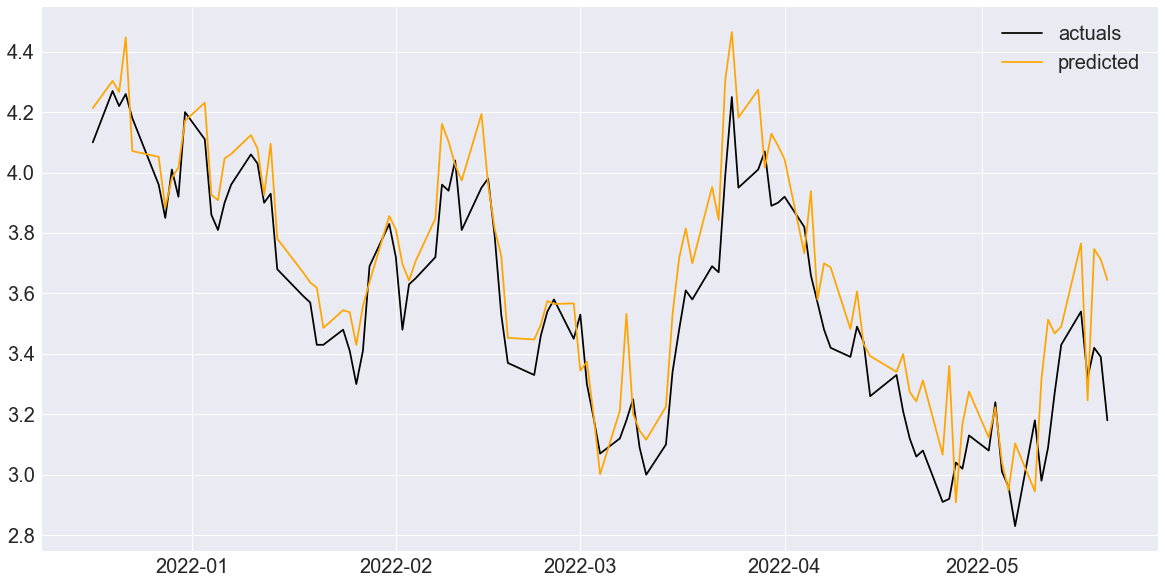

In [98]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test2['cron_next_close'], color='black')
ax.plot(y_test2['cron_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CRON target)

In [99]:
df_all = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all.csv')
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all = df_all.set_index('Date')

In [100]:
df_isna3 = df_all.isna()
df_isna3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [101]:
df_isna3 = df_isna3.add_suffix('_b')

In [102]:
df3 = df_all.fillna(0)
df3.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [103]:
df3 = pd.concat([df3, df_isna3], axis=1)
df3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [104]:
df3['month'] = df3.index.month
df3['day'] = df3.index.day
df3['year'] = df3.index.year
df3['quarter'] = (df3['month']-1)//3 + 1

In [105]:
cols = df3.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [106]:
df3 = df3[cols].copy()
df3

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [107]:
df3 = df3[cut:].copy()
df3

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-02-27      2   27  2018        1  21.275000  21.377001  20.070000   
2018-02-28      2   28  2018        1  20.440001  21.680000  20.097000   
2018-03-01      3    1  2018        1  21.309999  23.379999  21.016001   
2018-03-02      3    2  2018        1  23.030001  23.209999  22.219999   
2018-03-05      3    5  2018        1  22.715000  25.100000  22.482000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-02-27  20.636000     1382600       21.549999       21.320000 -0.913999   
2018-02-28  21.320000      733600       20.636000       23.350000  0.684000   
2018-03-01  23.350000     1300700       21.320000       22.521999  2.030000   
2018-03-02  22.521999     1046100       23.350000       24.917000 -0.828001   
2018-03-05  24.917000     1714700       22.521999       25.600000  2.395001   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-02-27    -0.042413             21.8320            -0.5568   
2018-02-28     0.033146             21.5772            -0.2548   
2018-03-01     0.095216             21.7792             0.2020   
2018-03-02    -0.035460             21.8756             0.0964   
2018-03-05     0.106341             22.5490             0.6734   
...                 ...                 ...                ...   
2022-05-17     0.027923              5.5780             0.0900   
2022-05-18    -0.050934              5.7000             0.1220   
2022-05-19     0.050089              5.8000             0.1000   
2022-05-20    -0.059625              5.7200            -0.0800   
2022-05-23    -0.059783              5.6120            -0.1080   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-02-27              21.9175             -0.0756       0.000        0.00   
2018-02-28              21.9290              0.0115       0.000        0.00   
2018-03-01              22.0890              0.1600       0.000        0.00   
2018-03-02              22.0922              0.0032       0.000        0.00   
2018-03-05              22.4689              0.3767       0.000        0.00   
...                         ...                 ...         ...         ...   
2022-05-17               5.7590             -0.0170       3.973        4.10   
2022-05-18               5.6510             -0.1080       3.990        4.07   
2022-05-19               5.6310             -0.0200       3.990        4.03   
2022-05-20               5.5860             -0.0450       3.990        4.20   
2022-05-23               5.5500             -0.0360       4.210        4.22   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [108]:
df3.drop(df3.tail(1).index, inplace=True)

In [109]:
n = int(len(df3) * 0.9)
n

960

In [110]:
train3 = df3[:n]
test3 = df3[n:]

In [111]:
print(len(train3))
print(len(test3))

960
107


In [112]:
X_train3 = train3.drop('cron_next_close', axis=1)
X_train3.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-02-27      2   27  2018        1  21.275000  21.377001  20.070000   
2018-02-28      2   28  2018        1  20.440001  21.680000  20.097000   
2018-03-01      3    1  2018        1  21.309999  23.379999  21.016001   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-02-27     20.636     1382600       21.549999       21.320000 -0.913999   
2018-02-28     21.320      733600       20.636000       23.350000  0.684000   
2018-03-01     23.350     1300700       21.320000       22.521999  2.030000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-02-27    -0.042413             21.8320            -0.5568   
2018-02-28     0.033146             21.5772            -0.2548   
2018-03-01     0.095216             21.7792             0.2020   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-02-27              21.9175             -0.0756         0.0         0.0   
2018-02-28              21.9290              0.0115         0.0         0.0   
2018-03-01              22.0890              0.1600         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-02-27        0.0          0.0           0.0               0.0   
2018-02-28        0.0          0.0           0.0               0.0   
2018-03-01        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-02-27               0.0         0.0            0.0                   0.0   
2018-02-28               0.0         0.0            0.0                   0.0   
2018-03-01               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-02-27                  0.0                    0.0                   0.0   
2018-02-28                  0.0                    0.0                   0.0   
2018-03-01                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24       8.38     7.170        7.62    2801000.0   
2018-02-28       7.75       9.17     7.335        9.17    9875400.0   
2018-03-01       9.18      10.05     8.520        9.69   11858800.0   

            cron_prev_close  cron_diff  cron_%change  cron_5day_avg_close  \
Date                                                                        
2018-02-27             0.00       0.00      0.000000                  0.0   
2018-02-28             7.62       1.55      0.203412                  0.0   
2018-03-01             9.17       0.52      0.056707                  0.0   

            cron_5day_avg_diff  cron_10day_avg_close  cron_10day_avg_diff  \
Date                                                                        
2018-02-27                 0.0                   0.0                  0.0   
2018-02-28                 0.0                   0.0                  0.0   
2018-03-01                 0.0                   0.0                  0.0   

            curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-02-27         0.0         0.0        0.0          0.0           0.0   
2018

In [113]:
X_train3.shape

(960, 263)

In [114]:
y_train3 = train3['cron_next_close']
y_train3.head(3)

Date
2018-02-27    9.17
2018-02-28    9.69
2018-03-01    9.40
Name: cron_next_close, dtype: float64

In [115]:
y_train3.tail(3)

Date
2021-12-14    4.11
2021-12-15    3.99
2021-12-16    4.31
Name: cron_next_close, dtype: float64

In [116]:
X_test3 = test3.drop('cron_next_close', axis=1)
y_test3 = test3['cron_next_close']

In [117]:
X_test3.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-17     12   17  2021        4     9.120     9.787    8.910       9.59   
2021-12-20     12   20  2021        4     9.052     9.180    8.525       8.75   
2021-12-21     12   21  2021        4     8.860     9.660    8.840       9.66   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-17     8074200            9.14            8.75      0.45     0.049234   
2021-12-20     8745300            9.59            9.66     -0.84    -0.087591   
2021-12-21     7112500            8.75            9.37      0.91     0.104000   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-17               9.292              0.006                9.795   
2021-12-20               9.180             -0.112                9.655   
2021-12-21               9.282              0.102                9.557   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-17              -0.040        6.85       6.850      6.625   
2021-12-20              -0.140        6.50       6.700      6.230   
2021-12-21              -0.098        6.30       6.505      6.070   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-17        6.660      956100.0              6.87             6.260   
2021-12-20        6.260      981800.0              6.66             6.189   
2021-12-21        6.189     1152300.0              6.26             6.400   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-17      -0.210      -0.030568                7.0040   
2021-12-20      -0.400      -0.060060                6.8060   
2021-12-21      -0.071      -0.011342                6.5958   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-17              -0.1880                 7.3984               -0.1430   
2021-12-20              -0.1980                 7.2644               -0.1340   
2021-12-21              -0.2102                 7.1079               -0.1565   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-17       3.94       4.34      3.90        4.31    3251300.0   
2021-12-20       4.10       4.23      4.02        4.10    2159400.0   
2021-12-21       4.10       4.35      4.08        4.27    2317000.0   

            cron_prev_close  cron_diff  cron_%change  cron_5day_avg_close  \
Date                                                                        
2021-12-17             3.99       0.32      0.080201                4.130   
2021-12-20             4.31      -0.21     -0.048724                4.118   
2021-12-21             4.10       0.17      0.041463                4.156   

            cron_5day_avg_diff  cron_10day_avg_close  cron_10day_avg_diff  \
Date                                                                        
2021-12-17               0.010                 4.283                0.015   
2021-12-20              -0.012                 4.261               -0.022   
2021-12-21               0.038                 4.237               -0.024   

            curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2021-12-17        8.55        8.83      8.550         8.60      600200.0   
2021-12-20        8.50  

In [118]:
X_test3.shape

(107, 263)

In [119]:
y_test3.tail(3)

Date
2022-05-18    3.42
2022-05-19    3.39
2022-05-20    3.18
Name: cron_next_close, dtype: float64

In [120]:
model3 = LinearRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

In [121]:
y_pred3[:5]

array([4.05546878, 4.55467109, 4.34857858, 4.53638263, 4.32810119])

In [122]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man3 = rmse_manual(y_test3, y_pred3)
print(rmse_man3)

0.14172421003945868


In [123]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man3 = mae_manual(y_test3, y_pred3)
print(mae_man3)

0.11303571961096283


In [124]:
y_train3 = pd.DataFrame(y_train3, columns=['cron_next_close'])
y_test3 = pd.DataFrame(y_test3, columns=['cron_next_close'])

In [125]:
y_test3['cron_pred_next_close'] = y_pred3

In [126]:
y_test3.tail()

cron_next_close  cron_pred_next_close
Date                                             
2022-05-16             3.54              3.378370
2022-05-17             3.32              3.412686
2022-05-18             3.42              3.379723
2022-05-19             3.39              3.274884
2022-05-20             3.18              3.525383

In [127]:
hyper_table.append(dict(stock='cron', 
                        version='All stocks',
                        model=model3, 
                        rmse=rmse_man3,
                        mae=mae_man3,
                        actual_price=y_test3['cron_next_close'][-1],
                        predicted_price=y_test3['cron_pred_next_close'][-1],
                        rows=df3.shape[0], 
                        train_rows=X_train3.shape[0],
                        test_rows=X_test3.shape[0],
                        columns=df3.shape[1]))

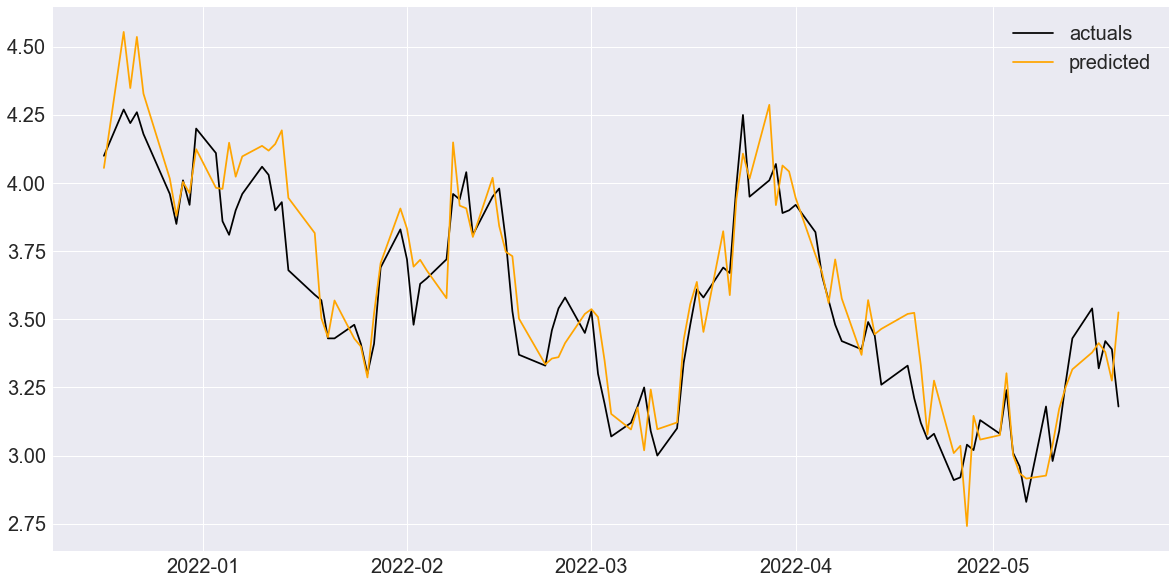

In [231]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test3['cron_next_close'], color='black')
ax.plot(y_test3['cron_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CRON target) and DJIX

In [129]:
df_all_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_dow.csv')
df_all_dow['Date'] = pd.to_datetime(df_all_dow['Date'])
df_all_dow = df_all_dow.set_index('Date')

In [130]:
df_isna4 = df_all_dow.isna()
df_isna4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [131]:
df_isna4 = df_isna4.add_suffix('_b')

In [132]:
df4 = df_all_dow.fillna(0)
df4.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [133]:
df4 = pd.concat([df4, df_isna4], axis=1)
df4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [134]:
df4['month'] = df4.index.month
df4['day'] = df4.index.day
df4['year'] = df4.index.year
df4['quarter'] = (df4['month']-1)//3 + 1

In [135]:
cols = df4.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [136]:
df4 = df4[cols].copy()
df4

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [137]:
df4 = df4[cut:].copy()
df4

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-02-27      2   27  2018        1  21.275000  21.377001  20.070000   
2018-02-28      2   28  2018        1  20.440001  21.680000  20.097000   
2018-03-01      3    1  2018        1  21.309999  23.379999  21.016001   
2018-03-02      3    2  2018        1  23.030001  23.209999  22.219999   
2018-03-05      3    5  2018        1  22.715000  25.100000  22.482000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-02-27  20.636000     1382600       21.549999       21.320000 -0.913999   
2018-02-28  21.320000      733600       20.636000       23.350000  0.684000   
2018-03-01  23.350000     1300700       21.320000       22.521999  2.030000   
2018-03-02  22.521999     1046100       23.350000       24.917000 -0.828001   
2018-03-05  24.917000     1714700       22.521999       25.600000  2.395001   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-02-27    -0.042413             21.8320            -0.5568   
2018-02-28     0.033146             21.5772            -0.2548   
2018-03-01     0.095216             21.7792             0.2020   
2018-03-02    -0.035460             21.8756             0.0964   
2018-03-05     0.106341             22.5490             0.6734   
...                 ...                 ...                ...   
2022-05-17     0.027923              5.5780             0.0900   
2022-05-18    -0.050934              5.7000             0.1220   
2022-05-19     0.050089              5.8000             0.1000   
2022-05-20    -0.059625              5.7200            -0.0800   
2022-05-23    -0.059783              5.6120            -0.1080   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-02-27              21.9175             -0.0756       0.000        0.00   
2018-02-28              21.9290              0.0115       0.000        0.00   
2018-03-01              22.0890              0.1600       0.000        0.00   
2018-03-02              22.0922              0.0032       0.000        0.00   
2018-03-05              22.4689              0.3767       0.000        0.00   
...                         ...                 ...         ...         ...   
2022-05-17               5.7590             -0.0170       3.973        4.10   
2022-05-18               5.6510             -0.1080       3.990        4.07   
2022-05-19               5.6310             -0.0200       3.990        4.03   
2022-05-20               5.5860             -0.0450       3.990        4.20   
2022-05-23               5.5500             -0.0360       4.210        4.22   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [138]:
df4.drop(df4.tail(1).index, inplace=True)

In [139]:
n = int(len(df4) * 0.9)
n

960

In [140]:
train4 = df4[:n]
test4 = df4[n:]

In [141]:
print(len(train4))
print(len(test4))

960
107


In [142]:
X_train4 = train4.drop('cron_next_close', axis=1)
X_train4.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-02-27      2   27  2018        1  21.275000  21.377001  20.070000   
2018-02-28      2   28  2018        1  20.440001  21.680000  20.097000   
2018-03-01      3    1  2018        1  21.309999  23.379999  21.016001   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-02-27     20.636     1382600       21.549999       21.320000 -0.913999   
2018-02-28     21.320      733600       20.636000       23.350000  0.684000   
2018-03-01     23.350     1300700       21.320000       22.521999  2.030000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-02-27    -0.042413             21.8320            -0.5568   
2018-02-28     0.033146             21.5772            -0.2548   
2018-03-01     0.095216             21.7792             0.2020   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-02-27              21.9175             -0.0756         0.0         0.0   
2018-02-28              21.9290              0.0115         0.0         0.0   
2018-03-01              22.0890              0.1600         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-02-27        0.0          0.0           0.0               0.0   
2018-02-28        0.0          0.0           0.0               0.0   
2018-03-01        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-02-27               0.0         0.0            0.0                   0.0   
2018-02-28               0.0         0.0            0.0                   0.0   
2018-03-01               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-02-27                  0.0                    0.0                   0.0   
2018-02-28                  0.0                    0.0                   0.0   
2018-03-01                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24       8.38     7.170        7.62    2801000.0   
2018-02-28       7.75       9.17     7.335        9.17    9875400.0   
2018-03-01       9.18      10.05     8.520        9.69   11858800.0   

            cron_prev_close  cron_diff  cron_%change  cron_5day_avg_close  \
Date                                                                        
2018-02-27             0.00       0.00      0.000000                  0.0   
2018-02-28             7.62       1.55      0.203412                  0.0   
2018-03-01             9.17       0.52      0.056707                  0.0   

            cron_5day_avg_diff  cron_10day_avg_close  cron_10day_avg_diff  \
Date                                                                        
2018-02-27                 0.0                   0.0                  0.0   
2018-02-28                 0.0                   0.0                  0.0   
2018-03-01                 0.0                   0.0                  0.0   

            curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-02-27         0.0         0.0        0.0          0.0           0.0   
2018

In [143]:
X_train4.shape

(960, 289)

In [144]:
y_train4 = train4['cron_next_close']
y_train4.head(3)

Date
2018-02-27    9.17
2018-02-28    9.69
2018-03-01    9.40
Name: cron_next_close, dtype: float64

In [145]:
y_train4.tail(3)

Date
2021-12-14    4.11
2021-12-15    3.99
2021-12-16    4.31
Name: cron_next_close, dtype: float64

In [146]:
X_test4 = test4.drop('cron_next_close', axis=1)
y_test4 = test4['cron_next_close']

In [147]:
X_test4.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-17     12   17  2021        4     9.120     9.787    8.910       9.59   
2021-12-20     12   20  2021        4     9.052     9.180    8.525       8.75   
2021-12-21     12   21  2021        4     8.860     9.660    8.840       9.66   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-17     8074200            9.14            8.75      0.45     0.049234   
2021-12-20     8745300            9.59            9.66     -0.84    -0.087591   
2021-12-21     7112500            8.75            9.37      0.91     0.104000   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-17               9.292              0.006                9.795   
2021-12-20               9.180             -0.112                9.655   
2021-12-21               9.282              0.102                9.557   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-17              -0.040        6.85       6.850      6.625   
2021-12-20              -0.140        6.50       6.700      6.230   
2021-12-21              -0.098        6.30       6.505      6.070   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-17        6.660      956100.0              6.87             6.260   
2021-12-20        6.260      981800.0              6.66             6.189   
2021-12-21        6.189     1152300.0              6.26             6.400   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-17      -0.210      -0.030568                7.0040   
2021-12-20      -0.400      -0.060060                6.8060   
2021-12-21      -0.071      -0.011342                6.5958   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-17              -0.1880                 7.3984               -0.1430   
2021-12-20              -0.1980                 7.2644               -0.1340   
2021-12-21              -0.2102                 7.1079               -0.1565   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-17       3.94       4.34      3.90        4.31    3251300.0   
2021-12-20       4.10       4.23      4.02        4.10    2159400.0   
2021-12-21       4.10       4.35      4.08        4.27    2317000.0   

            cron_prev_close  cron_diff  cron_%change  cron_5day_avg_close  \
Date                                                                        
2021-12-17             3.99       0.32      0.080201                4.130   
2021-12-20             4.31      -0.21     -0.048724                4.118   
2021-12-21             4.10       0.17      0.041463                4.156   

            cron_5day_avg_diff  cron_10day_avg_close  cron_10day_avg_diff  \
Date                                                                        
2021-12-17               0.010                 4.283                0.015   
2021-12-20              -0.012                 4.261               -0.022   
2021-12-21               0.038                 4.237               -0.024   

            curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2021-12-17        8.55        8.83      8.550         8.60      600200.0   
2021-12-20        8.50  

In [148]:
X_test4.shape

(107, 289)

In [149]:
y_test4.tail(3)

Date
2022-05-18    3.42
2022-05-19    3.39
2022-05-20    3.18
Name: cron_next_close, dtype: float64

In [150]:
model4 = LinearRegression()
model4.fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)

In [151]:
y_pred4[:5]

array([4.08905525, 4.55539224, 4.38554775, 4.55369767, 4.41907627])

In [152]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man4 = rmse_manual(y_test4, y_pred4)
print(rmse_man4)

0.1685318540776873


In [153]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man4 = mae_manual(y_test4, y_pred4)
print(mae_man4)

0.1334711967541484


In [154]:
y_train4 = pd.DataFrame(y_train4, columns=['cron_next_close'])
y_test4 = pd.DataFrame(y_test4, columns=['cron_next_close'])

In [155]:
y_test4['cron_pred_next_close'] = y_pred4

In [156]:
y_test4.tail()

cron_next_close  cron_pred_next_close
Date                                             
2022-05-16             3.54              3.391363
2022-05-17             3.32              3.301579
2022-05-18             3.42              3.271250
2022-05-19             3.39              3.224332
2022-05-20             3.18              3.490208

In [157]:
hyper_table.append(dict(stock='cron', 
                        version='All+Dow',
                        model=model4, 
                        rmse=rmse_man4,
                        mae=mae_man4,
                        actual_price=y_test4['cron_next_close'][-1],
                        predicted_price=y_test4['cron_pred_next_close'][-1],
                        rows=df4.shape[0], 
                        train_rows=X_train4.shape[0],
                        test_rows=X_test4.shape[0],
                        columns=df4.shape[1]))

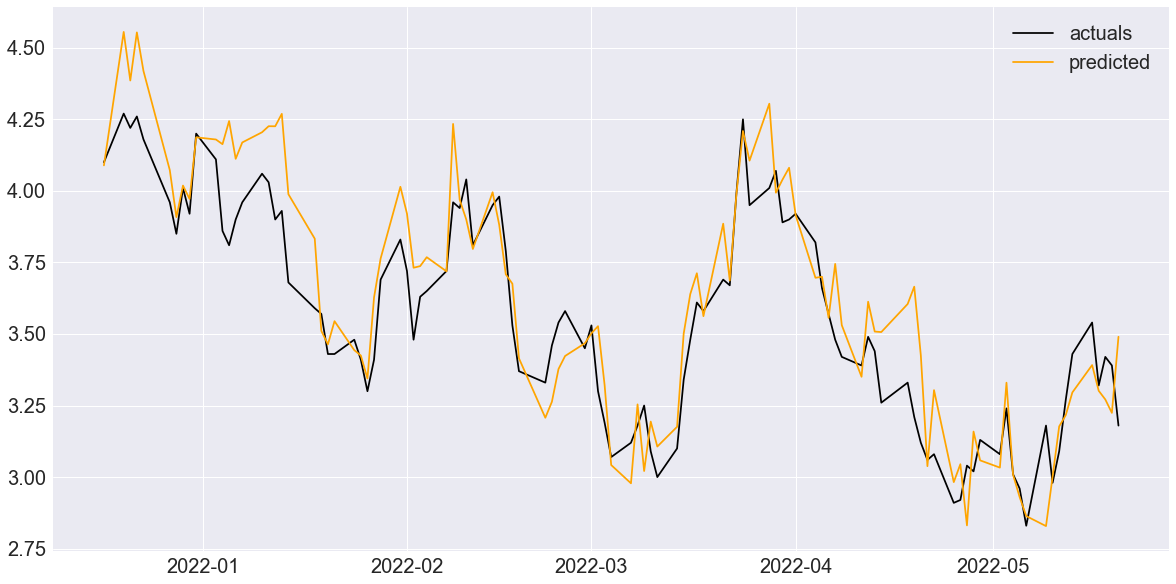

In [158]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test4['cron_next_close'], color='black')
ax.plot(y_test4['cron_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CRON target) and Cannabis ETFs

In [159]:
df_all_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs.csv')
df_all_etfs['Date'] = pd.to_datetime(df_all_etfs['Date'])
df_all_etfs = df_all_etfs.set_index('Date')

In [160]:
df_isna5 = df_all_etfs.isna()
df_isna5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [161]:
df_isna5 = df_isna5.add_suffix('_b')

In [162]:
df5 = df_all_etfs.fillna(0)
df5.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [163]:
df5 = pd.concat([df5, df_isna5], axis=1)
df5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [164]:
df5['month'] = df5.index.month
df5['day'] = df5.index.day
df5['year'] = df5.index.year
df5['quarter'] = (df5['month']-1)//3 + 1

In [165]:
cols = df5.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [166]:
df5 = df5[cols].copy()
df5

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [167]:
df5 = df5[cut:].copy()
df5

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-02-27      2   27  2018        1  21.275000  21.377001  20.070000   
2018-02-28      2   28  2018        1  20.440001  21.680000  20.097000   
2018-03-01      3    1  2018        1  21.309999  23.379999  21.016001   
2018-03-02      3    2  2018        1  23.030001  23.209999  22.219999   
2018-03-05      3    5  2018        1  22.715000  25.100000  22.482000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-02-27  20.636000     1382600       21.549999       21.320000 -0.913999   
2018-02-28  21.320000      733600       20.636000       23.350000  0.684000   
2018-03-01  23.350000     1300700       21.320000       22.521999  2.030000   
2018-03-02  22.521999     1046100       23.350000       24.917000 -0.828001   
2018-03-05  24.917000     1714700       22.521999       25.600000  2.395001   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-02-27    -0.042413             21.8320            -0.5568   
2018-02-28     0.033146             21.5772            -0.2548   
2018-03-01     0.095216             21.7792             0.2020   
2018-03-02    -0.035460             21.8756             0.0964   
2018-03-05     0.106341             22.5490             0.6734   
...                 ...                 ...                ...   
2022-05-17     0.027923              5.5780             0.0900   
2022-05-18    -0.050934              5.7000             0.1220   
2022-05-19     0.050089              5.8000             0.1000   
2022-05-20    -0.059625              5.7200            -0.0800   
2022-05-23    -0.059783              5.6120            -0.1080   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-02-27              21.9175             -0.0756       0.000        0.00   
2018-02-28              21.9290              0.0115       0.000        0.00   
2018-03-01              22.0890              0.1600       0.000        0.00   
2018-03-02              22.0922              0.0032       0.000        0.00   
2018-03-05              22.4689              0.3767       0.000        0.00   
...                         ...                 ...         ...         ...   
2022-05-17               5.7590             -0.0170       3.973        4.10   
2022-05-18               5.6510             -0.1080       3.990        4.07   
2022-05-19               5.6310             -0.0200       3.990        4.03   
2022-05-20               5.5860             -0.0450       3.990        4.20   
2022-05-23               5.5500             -0.0360       4.210        4.22   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [168]:
df5.drop(df5.tail(1).index, inplace=True)

In [169]:
n = int(len(df5) * 0.9)
n

960

In [170]:
train5 = df5[:n]
test5 = df5[n:]

In [171]:
print(len(train5))
print(len(test5))

960
107


In [172]:
X_train5 = train5.drop('cron_next_close', axis=1)
X_train5.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-02-27      2   27  2018        1  21.275000  21.377001  20.070000   
2018-02-28      2   28  2018        1  20.440001  21.680000  20.097000   
2018-03-01      3    1  2018        1  21.309999  23.379999  21.016001   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-02-27     20.636     1382600       21.549999       21.320000 -0.913999   
2018-02-28     21.320      733600       20.636000       23.350000  0.684000   
2018-03-01     23.350     1300700       21.320000       22.521999  2.030000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-02-27    -0.042413             21.8320            -0.5568   
2018-02-28     0.033146             21.5772            -0.2548   
2018-03-01     0.095216             21.7792             0.2020   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-02-27              21.9175             -0.0756         0.0         0.0   
2018-02-28              21.9290              0.0115         0.0         0.0   
2018-03-01              22.0890              0.1600         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-02-27        0.0          0.0           0.0               0.0   
2018-02-28        0.0          0.0           0.0               0.0   
2018-03-01        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-02-27               0.0         0.0            0.0                   0.0   
2018-02-28               0.0         0.0            0.0                   0.0   
2018-03-01               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-02-27                  0.0                    0.0                   0.0   
2018-02-28                  0.0                    0.0                   0.0   
2018-03-01                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24       8.38     7.170        7.62    2801000.0   
2018-02-28       7.75       9.17     7.335        9.17    9875400.0   
2018-03-01       9.18      10.05     8.520        9.69   11858800.0   

            cron_prev_close  cron_diff  cron_%change  cron_5day_avg_close  \
Date                                                                        
2018-02-27             0.00       0.00      0.000000                  0.0   
2018-02-28             7.62       1.55      0.203412                  0.0   
2018-03-01             9.17       0.52      0.056707                  0.0   

            cron_5day_avg_diff  cron_10day_avg_close  cron_10day_avg_diff  \
Date                                                                        
2018-02-27                 0.0                   0.0                  0.0   
2018-02-28                 0.0                   0.0                  0.0   
2018-03-01                 0.0                   0.0                  0.0   

            curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-02-27         0.0         0.0        0.0          0.0           0.0   
2018

In [173]:
X_train5.shape

(960, 393)

In [174]:
y_train5 = train5['cron_next_close']
y_train5.head(3)

Date
2018-02-27    9.17
2018-02-28    9.69
2018-03-01    9.40
Name: cron_next_close, dtype: float64

In [175]:
y_train5.tail(3)

Date
2021-12-14    4.11
2021-12-15    3.99
2021-12-16    4.31
Name: cron_next_close, dtype: float64

In [176]:
X_test5 = test5.drop('cron_next_close', axis=1)
y_test5 = test5['cron_next_close']

In [177]:
X_test5.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-17     12   17  2021        4     9.120     9.787    8.910       9.59   
2021-12-20     12   20  2021        4     9.052     9.180    8.525       8.75   
2021-12-21     12   21  2021        4     8.860     9.660    8.840       9.66   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-17     8074200            9.14            8.75      0.45     0.049234   
2021-12-20     8745300            9.59            9.66     -0.84    -0.087591   
2021-12-21     7112500            8.75            9.37      0.91     0.104000   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-17               9.292              0.006                9.795   
2021-12-20               9.180             -0.112                9.655   
2021-12-21               9.282              0.102                9.557   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-17              -0.040        6.85       6.850      6.625   
2021-12-20              -0.140        6.50       6.700      6.230   
2021-12-21              -0.098        6.30       6.505      6.070   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-17        6.660      956100.0              6.87             6.260   
2021-12-20        6.260      981800.0              6.66             6.189   
2021-12-21        6.189     1152300.0              6.26             6.400   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-17      -0.210      -0.030568                7.0040   
2021-12-20      -0.400      -0.060060                6.8060   
2021-12-21      -0.071      -0.011342                6.5958   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-17              -0.1880                 7.3984               -0.1430   
2021-12-20              -0.1980                 7.2644               -0.1340   
2021-12-21              -0.2102                 7.1079               -0.1565   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-17       3.94       4.34      3.90        4.31    3251300.0   
2021-12-20       4.10       4.23      4.02        4.10    2159400.0   
2021-12-21       4.10       4.35      4.08        4.27    2317000.0   

            cron_prev_close  cron_diff  cron_%change  cron_5day_avg_close  \
Date                                                                        
2021-12-17             3.99       0.32      0.080201                4.130   
2021-12-20             4.31      -0.21     -0.048724                4.118   
2021-12-21             4.10       0.17      0.041463                4.156   

            cron_5day_avg_diff  cron_10day_avg_close  cron_10day_avg_diff  \
Date                                                                        
2021-12-17               0.010                 4.283                0.015   
2021-12-20              -0.012                 4.261               -0.022   
2021-12-21               0.038                 4.237               -0.024   

            curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2021-12-17        8.55        8.83      8.550         8.60      600200.0   
2021-12-20        8.50  

In [178]:
X_test5.shape

(107, 393)

In [179]:
y_test5.tail(3)

Date
2022-05-18    3.42
2022-05-19    3.39
2022-05-20    3.18
Name: cron_next_close, dtype: float64

In [180]:
model5 = LinearRegression()
model5.fit(X_train5, y_train5)
y_pred5 = model5.predict(X_test5)

In [181]:
y_pred5[:5]

array([4.21530785, 4.61486362, 4.31934652, 4.87329023, 4.41149634])

In [182]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man5 = rmse_manual(y_test5, y_pred5)
print(rmse_man5)

0.5895422563710951


In [183]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man5 = mae_manual(y_test5, y_pred5)
print(mae_man5)

0.5507981907906058


In [184]:
y_train5 = pd.DataFrame(y_train5, columns=['cron_next_close'])
y_test5 = pd.DataFrame(y_test5, columns=['cron_next_close'])

In [185]:
y_test5['cron_pred_next_close'] = y_pred5

In [186]:
y_test5.tail()

cron_next_close  cron_pred_next_close
Date                                             
2022-05-16             3.54              4.277540
2022-05-17             3.32              3.803886
2022-05-18             3.42              4.331696
2022-05-19             3.39              4.034029
2022-05-20             3.18              4.442941

In [187]:
hyper_table.append(dict(stock='cron', 
                        version='All+ETFs',
                        model=model5, 
                        rmse=rmse_man5,
                        mae=mae_man5,
                        actual_price=y_test5['cron_next_close'][-1],
                        predicted_price=y_test5['cron_pred_next_close'][-1],
                        rows=df5.shape[0], 
                        train_rows=X_train5.shape[0],
                        test_rows=X_test5.shape[0],
                        columns=df5.shape[1]))

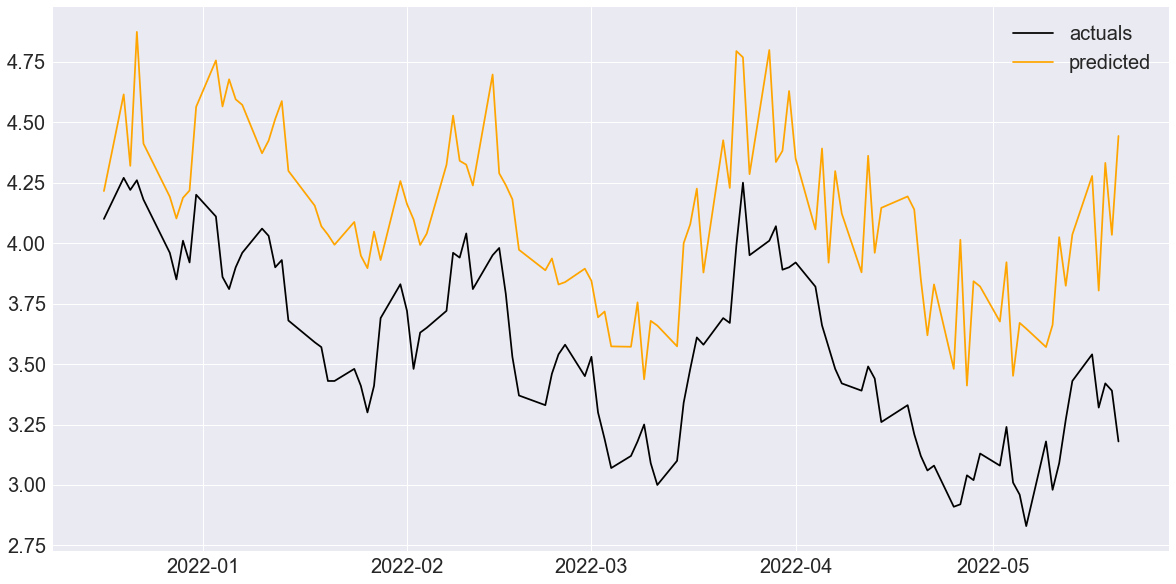

In [188]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test5['cron_next_close'], color='black')
ax.plot(y_test5['cron_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CRON target), Cannabis ETFs, and DJIX

In [189]:
df_all_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs_dow.csv')
df_all_etfs_dow['Date'] = pd.to_datetime(df_all_etfs_dow['Date'])
df_all_etfs_dow = df_all_etfs_dow.set_index('Date')

In [190]:
df_isna6 = df_all_etfs_dow.isna()
df_isna6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [191]:
df_isna6 = df_isna6.add_suffix('_b')

In [192]:
df6 = df_all_etfs_dow.fillna(0)
df6.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [193]:
df6 = pd.concat([df6, df_isna6], axis=1)
df6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [194]:
df6['month'] = df6.index.month
df6['day'] = df6.index.day
df6['year'] = df6.index.year
df6['quarter'] = (df6['month']-1)//3 + 1

In [195]:
cols = df6.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [196]:
df6 = df6[cols].copy()
df6

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [197]:
df6 = df6[cut:].copy()
df6

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-02-27      2   27  2018        1  21.275000  21.377001  20.070000   
2018-02-28      2   28  2018        1  20.440001  21.680000  20.097000   
2018-03-01      3    1  2018        1  21.309999  23.379999  21.016001   
2018-03-02      3    2  2018        1  23.030001  23.209999  22.219999   
2018-03-05      3    5  2018        1  22.715000  25.100000  22.482000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-02-27  20.636000     1382600       21.549999       21.320000 -0.913999   
2018-02-28  21.320000      733600       20.636000       23.350000  0.684000   
2018-03-01  23.350000     1300700       21.320000       22.521999  2.030000   
2018-03-02  22.521999     1046100       23.350000       24.917000 -0.828001   
2018-03-05  24.917000     1714700       22.521999       25.600000  2.395001   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-02-27    -0.042413             21.8320            -0.5568   
2018-02-28     0.033146             21.5772            -0.2548   
2018-03-01     0.095216             21.7792             0.2020   
2018-03-02    -0.035460             21.8756             0.0964   
2018-03-05     0.106341             22.5490             0.6734   
...                 ...                 ...                ...   
2022-05-17     0.027923              5.5780             0.0900   
2022-05-18    -0.050934              5.7000             0.1220   
2022-05-19     0.050089              5.8000             0.1000   
2022-05-20    -0.059625              5.7200            -0.0800   
2022-05-23    -0.059783              5.6120            -0.1080   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-02-27              21.9175             -0.0756       0.000        0.00   
2018-02-28              21.9290              0.0115       0.000        0.00   
2018-03-01              22.0890              0.1600       0.000        0.00   
2018-03-02              22.0922              0.0032       0.000        0.00   
2018-03-05              22.4689              0.3767       0.000        0.00   
...                         ...                 ...         ...         ...   
2022-05-17               5.7590             -0.0170       3.973        4.10   
2022-05-18               5.6510             -0.1080       3.990        4.07   
2022-05-19               5.6310             -0.0200       3.990        4.03   
2022-05-20               5.5860             -0.0450       3.990        4.20   
2022-05-23               5.5500             -0.0360       4.210        4.22   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [198]:
df6.drop(df6.tail(1).index, inplace=True)

In [199]:
n = int(len(df6) * 0.9)
n

960

In [200]:
train6 = df6[:n]
test6 = df6[n:]

In [201]:
print(len(train6))
print(len(test6))

960
107


In [202]:
X_train6 = train6.drop('cron_next_close', axis=1)
X_train6.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-02-27      2   27  2018        1  21.275000  21.377001  20.070000   
2018-02-28      2   28  2018        1  20.440001  21.680000  20.097000   
2018-03-01      3    1  2018        1  21.309999  23.379999  21.016001   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-02-27     20.636     1382600       21.549999       21.320000 -0.913999   
2018-02-28     21.320      733600       20.636000       23.350000  0.684000   
2018-03-01     23.350     1300700       21.320000       22.521999  2.030000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-02-27    -0.042413             21.8320            -0.5568   
2018-02-28     0.033146             21.5772            -0.2548   
2018-03-01     0.095216             21.7792             0.2020   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-02-27              21.9175             -0.0756         0.0         0.0   
2018-02-28              21.9290              0.0115         0.0         0.0   
2018-03-01              22.0890              0.1600         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-02-27        0.0          0.0           0.0               0.0   
2018-02-28        0.0          0.0           0.0               0.0   
2018-03-01        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-02-27               0.0         0.0            0.0                   0.0   
2018-02-28               0.0         0.0            0.0                   0.0   
2018-03-01               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-02-27                  0.0                    0.0                   0.0   
2018-02-28                  0.0                    0.0                   0.0   
2018-03-01                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-02-27       8.24       8.38     7.170        7.62    2801000.0   
2018-02-28       7.75       9.17     7.335        9.17    9875400.0   
2018-03-01       9.18      10.05     8.520        9.69   11858800.0   

            cron_prev_close  cron_diff  cron_%change  cron_5day_avg_close  \
Date                                                                        
2018-02-27             0.00       0.00      0.000000                  0.0   
2018-02-28             7.62       1.55      0.203412                  0.0   
2018-03-01             9.17       0.52      0.056707                  0.0   

            cron_5day_avg_diff  cron_10day_avg_close  cron_10day_avg_diff  \
Date                                                                        
2018-02-27                 0.0                   0.0                  0.0   
2018-02-28                 0.0                   0.0                  0.0   
2018-03-01                 0.0                   0.0                  0.0   

            curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-02-27         0.0         0.0        0.0          0.0           0.0   
2018

In [203]:
X_train6.shape

(960, 419)

In [204]:
y_train6 = train6['cron_next_close']
y_train6.head(3)

Date
2018-02-27    9.17
2018-02-28    9.69
2018-03-01    9.40
Name: cron_next_close, dtype: float64

In [205]:
y_train6.tail(3)

Date
2021-12-14    4.11
2021-12-15    3.99
2021-12-16    4.31
Name: cron_next_close, dtype: float64

In [206]:
X_test6 = test6.drop('cron_next_close', axis=1)
y_test6 = test6['cron_next_close']

In [207]:
X_test6.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-17     12   17  2021        4     9.120     9.787    8.910       9.59   
2021-12-20     12   20  2021        4     9.052     9.180    8.525       8.75   
2021-12-21     12   21  2021        4     8.860     9.660    8.840       9.66   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-17     8074200            9.14            8.75      0.45     0.049234   
2021-12-20     8745300            9.59            9.66     -0.84    -0.087591   
2021-12-21     7112500            8.75            9.37      0.91     0.104000   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-17               9.292              0.006                9.795   
2021-12-20               9.180             -0.112                9.655   
2021-12-21               9.282              0.102                9.557   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-17              -0.040        6.85       6.850      6.625   
2021-12-20              -0.140        6.50       6.700      6.230   
2021-12-21              -0.098        6.30       6.505      6.070   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-17        6.660      956100.0              6.87             6.260   
2021-12-20        6.260      981800.0              6.66             6.189   
2021-12-21        6.189     1152300.0              6.26             6.400   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-17      -0.210      -0.030568                7.0040   
2021-12-20      -0.400      -0.060060                6.8060   
2021-12-21      -0.071      -0.011342                6.5958   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-17              -0.1880                 7.3984               -0.1430   
2021-12-20              -0.1980                 7.2644               -0.1340   
2021-12-21              -0.2102                 7.1079               -0.1565   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-17       3.94       4.34      3.90        4.31    3251300.0   
2021-12-20       4.10       4.23      4.02        4.10    2159400.0   
2021-12-21       4.10       4.35      4.08        4.27    2317000.0   

            cron_prev_close  cron_diff  cron_%change  cron_5day_avg_close  \
Date                                                                        
2021-12-17             3.99       0.32      0.080201                4.130   
2021-12-20             4.31      -0.21     -0.048724                4.118   
2021-12-21             4.10       0.17      0.041463                4.156   

            cron_5day_avg_diff  cron_10day_avg_close  cron_10day_avg_diff  \
Date                                                                        
2021-12-17               0.010                 4.283                0.015   
2021-12-20              -0.012                 4.261               -0.022   
2021-12-21               0.038                 4.237               -0.024   

            curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2021-12-17        8.55        8.83      8.550         8.60      600200.0   
2021-12-20        8.50  

In [208]:
X_test6.shape

(107, 419)

In [209]:
y_test6.tail(3)

Date
2022-05-18    3.42
2022-05-19    3.39
2022-05-20    3.18
Name: cron_next_close, dtype: float64

In [210]:
model6 = LinearRegression()
model6.fit(X_train6, y_train6)
y_pred6 = model6.predict(X_test6)

In [211]:
y_pred6[:5]

array([4.29376063, 4.57902772, 4.29808975, 4.90516995, 4.43443581])

In [212]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man6 = rmse_manual(y_test6, y_pred6)
print(rmse_man6)

0.6241950243262097


In [213]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man6 = mae_manual(y_test6, y_pred6)
print(mae_man6)

0.5821536021514842


In [214]:
y_train6 = pd.DataFrame(y_train6, columns=['cron_next_close'])
y_test6 = pd.DataFrame(y_test6, columns=['cron_next_close'])

In [215]:
y_test6['cron_pred_next_close'] = y_pred6

In [216]:
y_test6.tail()

cron_next_close  cron_pred_next_close
Date                                             
2022-05-16             3.54              4.346574
2022-05-17             3.32              3.796953
2022-05-18             3.42              4.371834
2022-05-19             3.39              4.033094
2022-05-20             3.18              4.343553

In [217]:
hyper_table.append(dict(stock='cron', 
                        version='All+ETFs+Dow',
                        model=model6, 
                        rmse=rmse_man6,
                        mae=mae_man6,
                        actual_price=y_test6['cron_next_close'][-1],
                        predicted_price=y_test6['cron_pred_next_close'][-1],
                        rows=df6.shape[0], 
                        train_rows=X_train6.shape[0],
                        test_rows=X_test6.shape[0],
                        columns=df6.shape[1]))

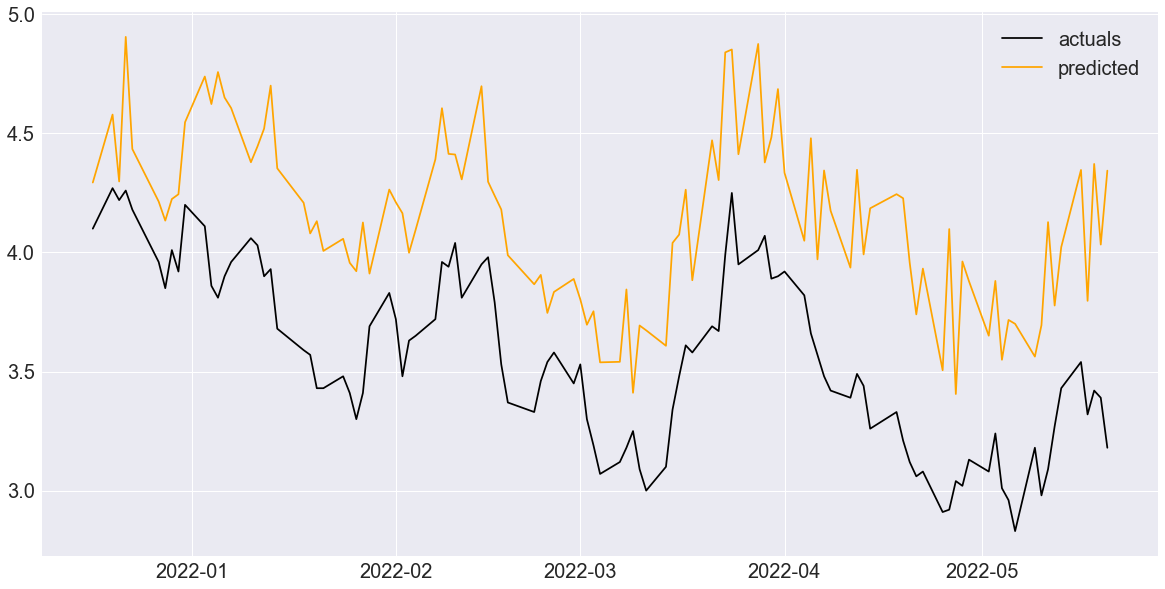

In [218]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test6['cron_next_close'], color='black')
ax.plot(y_test6['cron_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [219]:
hyper_table = pd.DataFrame(hyper_table)
hyper_table = hyper_table.sort_values('rmse', ascending=True)
hyper_table

stock       version               model      rmse       mae  actual_price  \
3  cron    All stocks  LinearRegression()  0.141724  0.113036          3.18   
0  cron         1+Dow  LinearRegression()  0.152640  0.119874          3.18   
1  cron        1+ETFs  LinearRegression()  0.153577  0.128405          3.18   
4  cron       All+Dow  LinearRegression()  0.168532  0.133471          3.18   
2  cron    1+ETFs+Dow  LinearRegression()  0.169275  0.136110          3.18   
5  cron      All+ETFs  LinearRegression()  0.589542  0.550798          3.18   
6  cron  All+ETFs+Dow  LinearRegression()  0.624195  0.582154          3.18   

   predicted_price  rows  train_rows  test_rows  columns  
3         3.525383  1067         960        107      264  
0         3.536645  1067         960        107       56  
1         3.678563  1067         960        107      160  
4         3.490208  1067         960        107      290  
2         3.644550  1067         960        107      186  
5         4.442941  1067         960        107      394  
6         4.343553  1067         960        107      420

In [220]:
hyper_table_cron = hyper_table.head(1)
hyper_table_cron

stock     version               model      rmse       mae  actual_price  \
3  cron  All stocks  LinearRegression()  0.141724  0.113036          3.18   

   predicted_price  rows  train_rows  test_rows  columns  
3         3.525383  1067         960        107      264

In [221]:
hyper_table_cron.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/data from notebooks/hyper_table_cron.csv', index=True)

## Simulation - Sell

In [222]:
cron_sim = df3[n:]
cron_sim = cron_sim[['cron_Open', 'cron_Close']]
cron_sim.head()

cron_Open  cron_Close
Date                             
2021-12-17       3.94        4.31
2021-12-20       4.10        4.10
2021-12-21       4.10        4.27
2021-12-22       4.21        4.22
2021-12-23       4.21        4.26

In [223]:
cron_sim.shape

(107, 2)

In [224]:
cron_sim.tail()

cron_Open  cron_Close
Date                             
2022-05-16       3.28        3.43
2022-05-17       3.51        3.54
2022-05-18       3.52        3.32
2022-05-19       3.32        3.42
2022-05-20       3.47        3.39

In [225]:
cron_sim['cron_Pred_Close'] = y_pred3
cron_sim.head()

cron_Open  cron_Close  cron_Pred_Close
Date                                              
2021-12-17       3.94        4.31         4.055469
2021-12-20       4.10        4.10         4.554671
2021-12-21       4.10        4.27         4.348579
2021-12-22       4.21        4.22         4.536383
2021-12-23       4.21        4.26         4.328101

In [226]:
cron_sim['Trade'] = cron_sim['cron_Pred_Close'] > cron_sim['cron_Open']
cron_sim.head()

cron_Open  cron_Close  cron_Pred_Close  Trade
Date                                                     
2021-12-17       3.94        4.31         4.055469   True
2021-12-20       4.10        4.10         4.554671   True
2021-12-21       4.10        4.27         4.348579   True
2021-12-22       4.21        4.22         4.536383   True
2021-12-23       4.21        4.26         4.328101   True

In [227]:
cron_sim = cron_sim[cron_sim['Trade']==True]
cron_sim.head()

cron_Open  cron_Close  cron_Pred_Close  Trade
Date                                                     
2021-12-17       3.94        4.31         4.055469   True
2021-12-20       4.10        4.10         4.554671   True
2021-12-21       4.10        4.27         4.348579   True
2021-12-22       4.21        4.22         4.536383   True
2021-12-23       4.21        4.26         4.328101   True

In [228]:
cron_sim['Gains'] = (cron_sim['cron_Close'] - cron_sim['cron_Open'])*100
cron_sim.head()

cron_Open  cron_Close  cron_Pred_Close  Trade  Gains
Date                                                            
2021-12-17       3.94        4.31         4.055469   True   37.0
2021-12-20       4.10        4.10         4.554671   True    0.0
2021-12-21       4.10        4.27         4.348579   True   17.0
2021-12-22       4.21        4.22         4.536383   True    1.0
2021-12-23       4.21        4.26         4.328101   True    5.0

In [229]:
total_gains = cron_sim['Gains'].sum()
print(round(total_gains, 2))

241.5
